### OLS (Oridnary Least Square) Task

#### 서울 자전거 대여 수 분석

- Date: 대여 날짜
- Rented Bike Count: 대여 수
- Hour: 대여 시간
- Temperature(°C): 온도(섭씨)
- Humidity(%): 습도 (%)
- Wind speed (m/s): 풍속 (m/s)
- Visibility (10m): 가시거리 (10m)
- Dew point temperature(°C): 이슬점(°C), 이슬점이 낮으면 10~15°C 정도로 공기가 편안하게 느껴진다.
- Solar Radiation (MJ/m2): 태양복사 (MJ/m2)
- Rainfall(mm): 강우량/비 (mm)
- Snowfall (cm): 강우량/눈 (cm)
- Seasons: 계절
- Holiday: 공휴일
- Functioning Day: 운영 여부

In [1]:
import pandas as pd
import chardet

# 'rb': 데이터가 깨진다면 이 옵션 추가해볼 것
rawdata = open('./datasets/seoul_bicycle.csv', 'rb').read()
result = chardet.detect(rawdata)

result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [2]:
import pandas as pd

b_df = pd.read_csv('./datasets/seoul_bicycle.csv', encoding='ISO-8859-1')

b_df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [3]:
# 일부 컬럼명 변경
pre_b_df = b_df.rename(columns={'Temperature(°C)': 'Temperature',
                               'Humidity(%)': 'Humidity',
                               'Wind speed (m/s)': 'Wind speed',
                               'Visibility (10m)': 'Visibility',
                               'Dew point temperature(°C)': 'Dew point temperature',
                               'Solar Radiation (MJ/m2)': 'Solar Radiation',
                               'Rainfall(mm)': 'Rainfall',
                               'Snowfall (cm)': 'Snowfall',})

pre_b_df

Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0     01/12/2017                254     0         -5.2        37         2.2   
1     01/12/2017                204     1         -5.5        38         0.8   
2     01/12/2017                173     2         -6.0        39         1.0   
3     01/12/2017                107     3         -6.2        40         0.9   
4     01/12/2017                 78     4         -6.0        36         2.3   
...          ...                ...   ...          ...       ...         ...   
8755  30/11/2018               1003    19          4.2        34         2.6   
8756  30/11/2018                764    20          3.4        37         2.3   
8757  30/11/2018                694    21          2.6        39         0.3   
8758  30/11/2018                712    22          2.1        41         1.0   
8759  30/11/2018                584    23          1.9        43         1.3   

      Visibility  Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0           2000                  -17.6              0.0       0.0       0.0   
1           2000                  -17.6              0.0       0.0       0.0   
2           2000                  -17.7              0.0       0.0       0.0   
3           2000                  -17.6              0.0       0.0       0.0   
4           2000                  -18.6              0.0       0.0       0.0   
...          ...                    ...              ...       ...       ...   
8755        1894                  -10.3              0.0       0.0       0.0   
8756        2000                   -9.9              0.0       0.0       0.0   
8757        1968                   -9.9              0.0       0.0       0.0   
8758        1859                   -9.8              0.0       0.0       0.0   
8759        1909                   -9.3              0.0       0.0       0.0   

     Seasons     Holiday Functioning Day  
0     Winter  No Holiday             Yes  
1     Winter  No Holiday             Yes  
2     Winter  No Holiday             Yes  
3     Winter  No Holiday             Yes  
4     Winter  No Holiday             Yes  
...      ...         ...             ...  
8755  Autumn  No Holiday             Yes  
8756  Autumn  No Holiday             Yes  
8757  Autumn  No Holiday             Yes  
8758  Autumn  No Holiday             Yes  
8759  Autumn  No Holiday             Yes  

[8760 rows x 14 columns]

In [4]:
# 의미가 중복되는 컬럼 제거
pre_b_df = pre_b_df.iloc[:, 1:]

pre_b_df

Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
0                   254     0         -5.2        37         2.2        2000   
1                   204     1         -5.5        38         0.8        2000   
2                   173     2         -6.0        39         1.0        2000   
3                   107     3         -6.2        40         0.9        2000   
4                    78     4         -6.0        36         2.3        2000   
...                 ...   ...          ...       ...         ...         ...   
8755               1003    19          4.2        34         2.6        1894   
8756                764    20          3.4        37         2.3        2000   
8757                694    21          2.6        39         0.3        1968   
8758                712    22          2.1        41         1.0        1859   
8759                584    23          1.9        43         1.3        1909   

      Dew point temperature  Solar Radiation  Rainfall  Snowfall Seasons  \
0                     -17.6              0.0       0.0       0.0  Winter   
1                     -17.6              0.0       0.0       0.0  Winter   
2                     -17.7              0.0       0.0       0.0  Winter   
3                     -17.6              0.0       0.0       0.0  Winter   
4                     -18.6              0.0       0.0       0.0  Winter   
...                     ...              ...       ...       ...     ...   
8755                  -10.3              0.0       0.0       0.0  Autumn   
8756                   -9.9              0.0       0.0       0.0  Autumn   
8757                   -9.9              0.0       0.0       0.0  Autumn   
8758                   -9.8              0.0       0.0       0.0  Autumn   
8759                   -9.3              0.0       0.0       0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 13 columns]

In [5]:
# 카테고리형 컬럼의 value_counts 출력
pre_b_df.Seasons.value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [6]:
pre_b_df.Holiday.value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [7]:
pre_b_df['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

#### 인코딩 방향
- Holiday, Functioning Day(Target): 레이블이 2개이므로 레이블 인코딩
- Seasons: 레이블이 4개이며, 서로 간의 우선순위가 없으니 원핫 인코딩

In [8]:
from sklearn.preprocessing import LabelEncoder

columns = ['Holiday', 'Functioning Day']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(pre_b_df[column])
    label_encoders[column] = encoder.classes_
    pre_b_df[column] = result

label_encoders

{'Holiday': array(['Holiday', 'No Holiday'], dtype=object),
 'Functioning Day': array(['No', 'Yes'], dtype=object)}

In [9]:
# 현재 데이터프레임 상태 확인
pre_b_df

Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
0                   254     0         -5.2        37         2.2        2000   
1                   204     1         -5.5        38         0.8        2000   
2                   173     2         -6.0        39         1.0        2000   
3                   107     3         -6.2        40         0.9        2000   
4                    78     4         -6.0        36         2.3        2000   
...                 ...   ...          ...       ...         ...         ...   
8755               1003    19          4.2        34         2.6        1894   
8756                764    20          3.4        37         2.3        2000   
8757                694    21          2.6        39         0.3        1968   
8758                712    22          2.1        41         1.0        1859   
8759                584    23          1.9        43         1.3        1909   

      Dew point temperature  Solar Radiation  Rainfall  Snowfall Seasons  \
0                     -17.6              0.0       0.0       0.0  Winter   
1                     -17.6              0.0       0.0       0.0  Winter   
2                     -17.7              0.0       0.0       0.0  Winter   
3                     -17.6              0.0       0.0       0.0  Winter   
4                     -18.6              0.0       0.0       0.0  Winter   
...                     ...              ...       ...       ...     ...   
8755                  -10.3              0.0       0.0       0.0  Autumn   
8756                   -9.9              0.0       0.0       0.0  Autumn   
8757                   -9.9              0.0       0.0       0.0  Autumn   
8758                   -9.8              0.0       0.0       0.0  Autumn   
8759                   -9.3              0.0       0.0       0.0  Autumn   

      Holiday  Functioning Day  
0           1                1  
1           1                1  
2           1                1  
3           1                1  
4           1                1  
...       ...              ...  
8755        1                1  
8756        1                1  
8757        1                1  
8758        1                1  
8759        1                1  

[8760 rows x 13 columns]

In [10]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# sparse_output=False: ndarray 타입으로 리턴
# sparse_output=True: 희소 행렬로 리턴
one_hot_encoder = OneHotEncoder(sparse_output=False)

# 원핫 인코더로 fit 할 때, 데이터프레임 형태로 전달한다
result = one_hot_encoder.fit_transform(pre_b_df[['Seasons']])

# 원핫 인코더의 categories_: 레이블 인코더의 classes_ 같은 기능
one_hot_encoder.categories_

[array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object)]

In [11]:
# 기존 데이터프레임에 원핫 인코딩에 들어간 레이블들(레이블 하나 = 컬럼 하나)을 컬럼으로 만든 후
# 데이터 타입을 int8로 변경
pre_b_df = pd.concat([pre_b_df,
                     pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)],
                     axis=1)

pre_b_df

Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
0                   254     0         -5.2        37         2.2        2000   
1                   204     1         -5.5        38         0.8        2000   
2                   173     2         -6.0        39         1.0        2000   
3                   107     3         -6.2        40         0.9        2000   
4                    78     4         -6.0        36         2.3        2000   
...                 ...   ...          ...       ...         ...         ...   
8755               1003    19          4.2        34         2.6        1894   
8756                764    20          3.4        37         2.3        2000   
8757                694    21          2.6        39         0.3        1968   
8758                712    22          2.1        41         1.0        1859   
8759                584    23          1.9        43         1.3        1909   

      Dew point temperature  Solar Radiation  Rainfall  Snowfall Seasons  \
0                     -17.6              0.0       0.0       0.0  Winter   
1                     -17.6              0.0       0.0       0.0  Winter   
2                     -17.7              0.0       0.0       0.0  Winter   
3                     -17.6              0.0       0.0       0.0  Winter   
4                     -18.6              0.0       0.0       0.0  Winter   
...                     ...              ...       ...       ...     ...   
8755                  -10.3              0.0       0.0       0.0  Autumn   
8756                   -9.9              0.0       0.0       0.0  Autumn   
8757                   -9.9              0.0       0.0       0.0  Autumn   
8758                   -9.8              0.0       0.0       0.0  Autumn   
8759                   -9.3              0.0       0.0       0.0  Autumn   

      Holiday  Functioning Day  (Autumn,)  (Spring,)  (Summer,)  (Winter,)  
0           1                1          0          0          0          1  
1           1                1          0          0          0          1  
2           1                1          0          0          0          1  
3           1                1          0          0          0          1  
4           1                1          0          0          0          1  
...       ...              ...        ...        ...        ...        ...  
8755        1                1          1          0          0          0  
8756        1                1          1          0          0          0  
8757        1                1          1          0          0          0  
8758        1                1          1          0          0          0  
8759        1                1          1          0          0          0  

[8760 rows x 17 columns]

In [12]:
# 불필요해진 Seasons 컬럼 제거
pre_b_df = pre_b_df.drop(labels=['Seasons'], axis=1)

pre_b_df

Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
0                   254     0         -5.2        37         2.2        2000   
1                   204     1         -5.5        38         0.8        2000   
2                   173     2         -6.0        39         1.0        2000   
3                   107     3         -6.2        40         0.9        2000   
4                    78     4         -6.0        36         2.3        2000   
...                 ...   ...          ...       ...         ...         ...   
8755               1003    19          4.2        34         2.6        1894   
8756                764    20          3.4        37         2.3        2000   
8757                694    21          2.6        39         0.3        1968   
8758                712    22          2.1        41         1.0        1859   
8759                584    23          1.9        43         1.3        1909   

      Dew point temperature  Solar Radiation  Rainfall  Snowfall  Holiday  \
0                     -17.6              0.0       0.0       0.0        1   
1                     -17.6              0.0       0.0       0.0        1   
2                     -17.7              0.0       0.0       0.0        1   
3                     -17.6              0.0       0.0       0.0        1   
4                     -18.6              0.0       0.0       0.0        1   
...                     ...              ...       ...       ...      ...   
8755                  -10.3              0.0       0.0       0.0        1   
8756                   -9.9              0.0       0.0       0.0        1   
8757                   -9.9              0.0       0.0       0.0        1   
8758                   -9.8              0.0       0.0       0.0        1   
8759                   -9.3              0.0       0.0       0.0        1   

      Functioning Day  (Autumn,)  (Spring,)  (Summer,)  (Winter,)  
0                   1          0          0          0          1  
1                   1          0          0          0          1  
2                   1          0          0          0          1  
3                   1          0          0          0          1  
4                   1          0          0          0          1  
...               ...        ...        ...        ...        ...  
8755                1          1          0          0          0  
8756                1          1          0          0          0  
8757                1          1          0          0          0  
8758                1          1          0          0          0  
8759                1          1          0          0          0  

[8760 rows x 16 columns]

In [13]:
# 일부 컬럼 이름 변경
pre_b_df.columns = ['Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility',
                    'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Holiday',
                    'Functioning Day', 'Autumn', 'Spring', 'Summer', 'Winter']

pre_b_df

Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
0                   254     0         -5.2        37         2.2        2000   
1                   204     1         -5.5        38         0.8        2000   
2                   173     2         -6.0        39         1.0        2000   
3                   107     3         -6.2        40         0.9        2000   
4                    78     4         -6.0        36         2.3        2000   
...                 ...   ...          ...       ...         ...         ...   
8755               1003    19          4.2        34         2.6        1894   
8756                764    20          3.4        37         2.3        2000   
8757                694    21          2.6        39         0.3        1968   
8758                712    22          2.1        41         1.0        1859   
8759                584    23          1.9        43         1.3        1909   

      Dew point temperature  Solar Radiation  Rainfall  Snowfall  Holiday  \
0                     -17.6              0.0       0.0       0.0        1   
1                     -17.6              0.0       0.0       0.0        1   
2                     -17.7              0.0       0.0       0.0        1   
3                     -17.6              0.0       0.0       0.0        1   
4                     -18.6              0.0       0.0       0.0        1   
...                     ...              ...       ...       ...      ...   
8755                  -10.3              0.0       0.0       0.0        1   
8756                   -9.9              0.0       0.0       0.0        1   
8757                   -9.9              0.0       0.0       0.0        1   
8758                   -9.8              0.0       0.0       0.0        1   
8759                   -9.3              0.0       0.0       0.0        1   

      Functioning Day  Autumn  Spring  Summer  Winter  
0                   1       0       0       0       1  
1                   1       0       0       0       1  
2                   1       0       0       0       1  
3                   1       0       0       0       1  
4                   1       0       0       0       1  
...               ...     ...     ...     ...     ...  
8755                1       1       0       0       0  
8756                1       1       0       0       0  
8757                1       1       0       0       0  
8758                1       1       0       0       0  
8759                1       1       0       0       0  

[8760 rows x 16 columns]

In [14]:
# 컬럼 순서 재배치
df_columns = ['Hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility',
             'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Holiday',
              'Functioning Day', 'Spring', 'Summer', 'Autumn', 'Winter', 'Rented Bike Count']

pre_b_df = pre_b_df.loc[:, df_columns]

pre_b_df

Hour  Temperature  Humidity  Wind speed  Visibility  \
0        0         -5.2        37         2.2        2000   
1        1         -5.5        38         0.8        2000   
2        2         -6.0        39         1.0        2000   
3        3         -6.2        40         0.9        2000   
4        4         -6.0        36         2.3        2000   
...    ...          ...       ...         ...         ...   
8755    19          4.2        34         2.6        1894   
8756    20          3.4        37         2.3        2000   
8757    21          2.6        39         0.3        1968   
8758    22          2.1        41         1.0        1859   
8759    23          1.9        43         1.3        1909   

      Dew point temperature  Solar Radiation  Rainfall  Snowfall  Holiday  \
0                     -17.6              0.0       0.0       0.0        1   
1                     -17.6              0.0       0.0       0.0        1   
2                     -17.7              0.0       0.0       0.0        1   
3                     -17.6              0.0       0.0       0.0        1   
4                     -18.6              0.0       0.0       0.0        1   
...                     ...              ...       ...       ...      ...   
8755                  -10.3              0.0       0.0       0.0        1   
8756                   -9.9              0.0       0.0       0.0        1   
8757                   -9.9              0.0       0.0       0.0        1   
8758                   -9.8              0.0       0.0       0.0        1   
8759                   -9.3              0.0       0.0       0.0        1   

      Functioning Day  Spring  Summer  Autumn  Winter  Rented Bike Count  
0                   1       0       0       0       1                254  
1                   1       0       0       0       1                204  
2                   1       0       0       0       1                173  
3                   1       0       0       0       1                107  
4                   1       0       0       0       1                 78  
...               ...     ...     ...     ...     ...                ...  
8755                1       0       0       1       0               1003  
8756                1       0       0       1       0                764  
8757                1       0       0       1       0                694  
8758                1       0       0       1       0                712  
8759                1       0       0       1       0                584  

[8760 rows x 16 columns]

array([[<Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Wind speed'}>],
       [<Axes: title={'center': 'Visibility'}>,
        <Axes: title={'center': 'Dew point temperature'}>,
        <Axes: title={'center': 'Solar Radiation'}>,
        <Axes: title={'center': 'Rainfall'}>],
       [<Axes: title={'center': 'Snowfall'}>,
        <Axes: title={'center': 'Holiday'}>,
        <Axes: title={'center': 'Functioning Day'}>,
        <Axes: title={'center': 'Spring'}>],
       [<Axes: title={'center': 'Summer'}>,
        <Axes: title={'center': 'Autumn'}>,
        <Axes: title={'center': 'Winter'}>,
        <Axes: title={'center': 'Rented Bike Count'}>]], dtype=object)

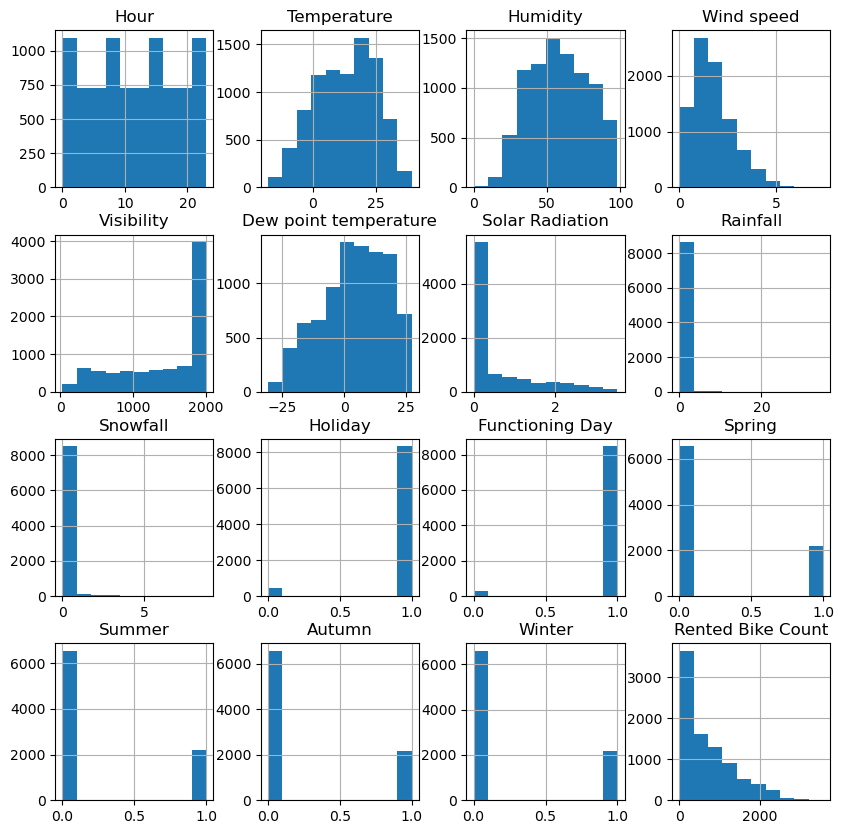

In [15]:
pre_b_df.hist(figsize=(10, 10))

#### 중간 분석
- 현재 타겟의 데이터 분포가 높은 첨도를 보임
- 따라서 로그 적용 후 이후 과정 진행

<Axes: >

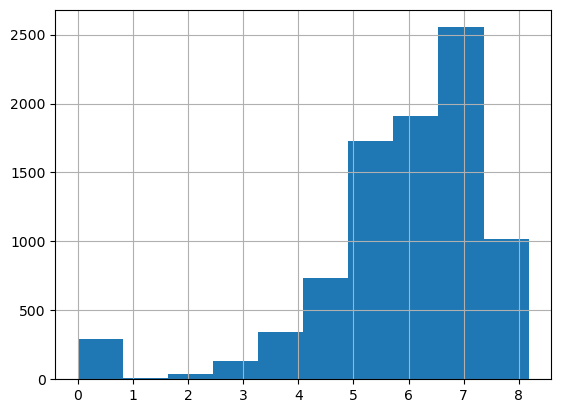

In [16]:
import numpy as np

np.log1p(pre_b_df['Rented Bike Count']).hist()

<Axes: >

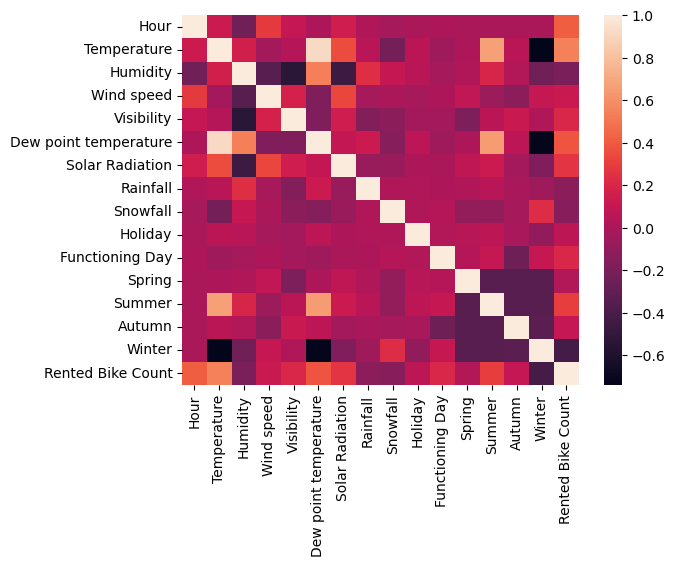

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 전체의 상관관계를 히트맵으로 시각화
sns.heatmap(pre_b_df.corr())

In [18]:
# 타겟과의 상관관계 출력
pre_b_df.corr()['Rented Bike Count'].sort_values(ascending=False)[1:]

Temperature              0.538558
Hour                     0.410257
Dew point temperature    0.379788
Summer                   0.296549
Solar Radiation          0.261837
Functioning Day          0.203943
Visibility               0.199280
Wind speed               0.121108
Autumn                   0.102753
Holiday                  0.072338
Spring                   0.022888
Rainfall                -0.123074
Snowfall                -0.141804
Humidity                -0.199780
Winter                  -0.424925
Name: Rented Bike Count, dtype: float64

In [19]:
import statsmodels.api as sm

# 불필요한 컬럼을 더 확실하게 골라내기 위한 정보 출력
features, targets = pre_b_df.iloc[:, :-1], pre_b_df.iloc[:, -1]

print(sm.OLS(targets, features).fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     764.8
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:48:22   Log-Likelihood:                -65598.
No. Observations:                8760   AIC:                         1.312e+05
Df Residuals:                    8745   BIC:                         1.313e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Hour                     27.53

<Axes: >

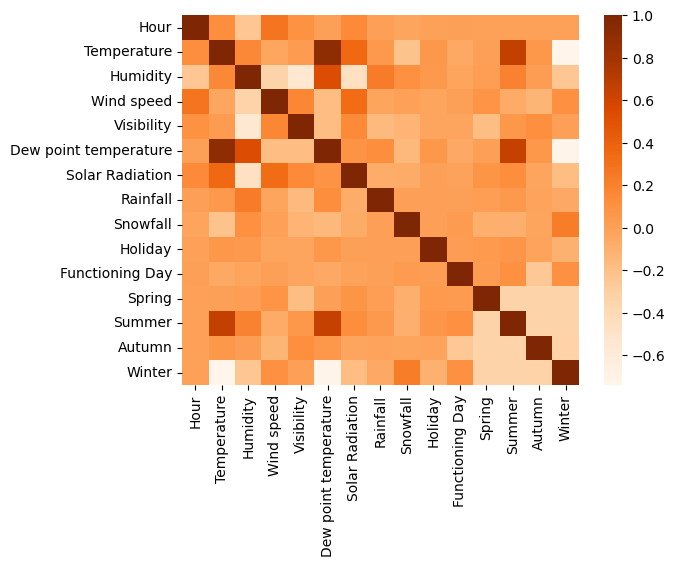

In [20]:
# feature들간의 상관관계 시각화
sns.heatmap(features.corr(), cmap='Oranges')

In [21]:
features.corr()

Hour  Temperature  Humidity  Wind speed  \
Hour                   1.000000e+00     0.124114 -0.241644    0.285197   
Temperature            1.241145e-01     1.000000  0.159371   -0.036252   
Humidity              -2.416438e-01     0.159371  1.000000   -0.336683   
Wind speed             2.851967e-01    -0.036252 -0.336683    1.000000   
Visibility             9.875348e-02     0.034794 -0.543090    0.171507   
Dew point temperature  3.054372e-03     0.912798  0.536894   -0.176486   
Solar Radiation        1.451309e-01     0.353505 -0.461919    0.332274   
Rainfall               8.714642e-03     0.050282  0.236397   -0.019674   
Snowfall              -2.151645e-02    -0.218405  0.108183   -0.003554   
Holiday                1.289087e-16     0.055931  0.050278   -0.023017   
Functioning Day        5.439377e-03    -0.050170 -0.020800    0.005037   
Spring                -1.159917e-15     0.007960  0.015694    0.083855   
Summer                 8.578102e-16     0.665846  0.192595   -0.064698   
Autumn                 1.991407e-15     0.059728  0.028367   -0.128009   
Winter                -1.697335e-15    -0.738720 -0.238295    0.109186   

                       Visibility  Dew point temperature  Solar Radiation  \
Hour                     0.098753               0.003054         0.145131   
Temperature              0.034794               0.912798         0.353505   
Humidity                -0.543090               0.536894        -0.461919   
Wind speed               0.171507              -0.176486         0.332274   
Visibility               1.000000              -0.176630         0.149738   
Dew point temperature   -0.176630               1.000000         0.094381   
Solar Radiation          0.149738               0.094381         1.000000   
Rainfall                -0.167629               0.125597        -0.074290   
Snowfall                -0.121695              -0.150887        -0.072301   
Holiday                 -0.031773               0.066759         0.005077   
Functioning Day         -0.026000              -0.052837        -0.007665   
Spring                  -0.187498               0.002056         0.079974   
Summer                   0.061958               0.652378         0.128402   
Autumn                   0.117413               0.062878        -0.031374   
Winter                   0.008616              -0.722366        -0.178420   

                       Rainfall  Snowfall       Holiday  Functioning Day  \
Hour                   0.008715 -0.021516  1.289087e-16         0.005439   
Temperature            0.050282 -0.218405  5.593084e-02        -0.050170   
Humidity               0.236397  0.108183  5.027765e-02        -0.020800   
Wind speed            -0.019674 -0.003554 -2.301677e-02         0.005037   
Visibility            -0.167629 -0.121695 -3.177281e-02        -0.026000   
Dew point temperature  0.125597 -0.150887  6.675910e-02        -0.052837   
Solar Radiation       -0.074290 -0.072301  5.077255e-03        -0.007665   
Rainfall               1.000000  0.008500  1.426911e-02         0.002055   
Snowfall               0.008500  1.000000  1.259072e-02         0.032089   
Holiday                0.014269  0.012591  1.000000e+00         0.027624   
Functioning Day        0.002055  0.032089  2.762445e-02         1.000000   
Spring                 0.017595 -0.099785  4.479057e-02         0.038413   
Summer                 0.053928 -0.099785  7.393239e-02         0.108370   
Autumn                -0.013247 -0.024742 -1.498458e-02        -0.253718   
Winter                -0.058755  0.225875 -1.045574e-01         0.106795   

                             Spring        Summer        Autumn        Winter  
Hour                  -1.159917e-15  8.578102e-16  1.991407e-15 -1.697335e-15  
Temperature            7.959684e-03  6.658462e-01  5.972825e-02 -7.387196e-01  
Humidity               1.569416e-02  1.925949e-01  2.836650e-02 -2.382952e-01  
Wind speed             8.385451e-02 -6.469790e-02 -1.280093e-01  1.091865e-0

### feature들 간 VIF, 다중 공선성 조사 

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_VIF(features):
    vif = pd.DataFrame()
    vif['score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [23]:
display(feature_engineering_VIF(features))

score                feature
0     1.209577                   Hour
1    89.477069            Temperature
2    20.553911               Humidity
3     1.303644             Wind speed
4     1.689144             Visibility
5   117.298694  Dew point temperature
6     2.034617        Solar Radiation
7     1.085306               Rainfall
8     1.119845               Snowfall
9     1.023340                Holiday
10    1.080974        Functioning Day
11  115.576829                 Spring
12  119.626912                 Summer
13  113.367273                 Autumn
14  109.548960                 Winter

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

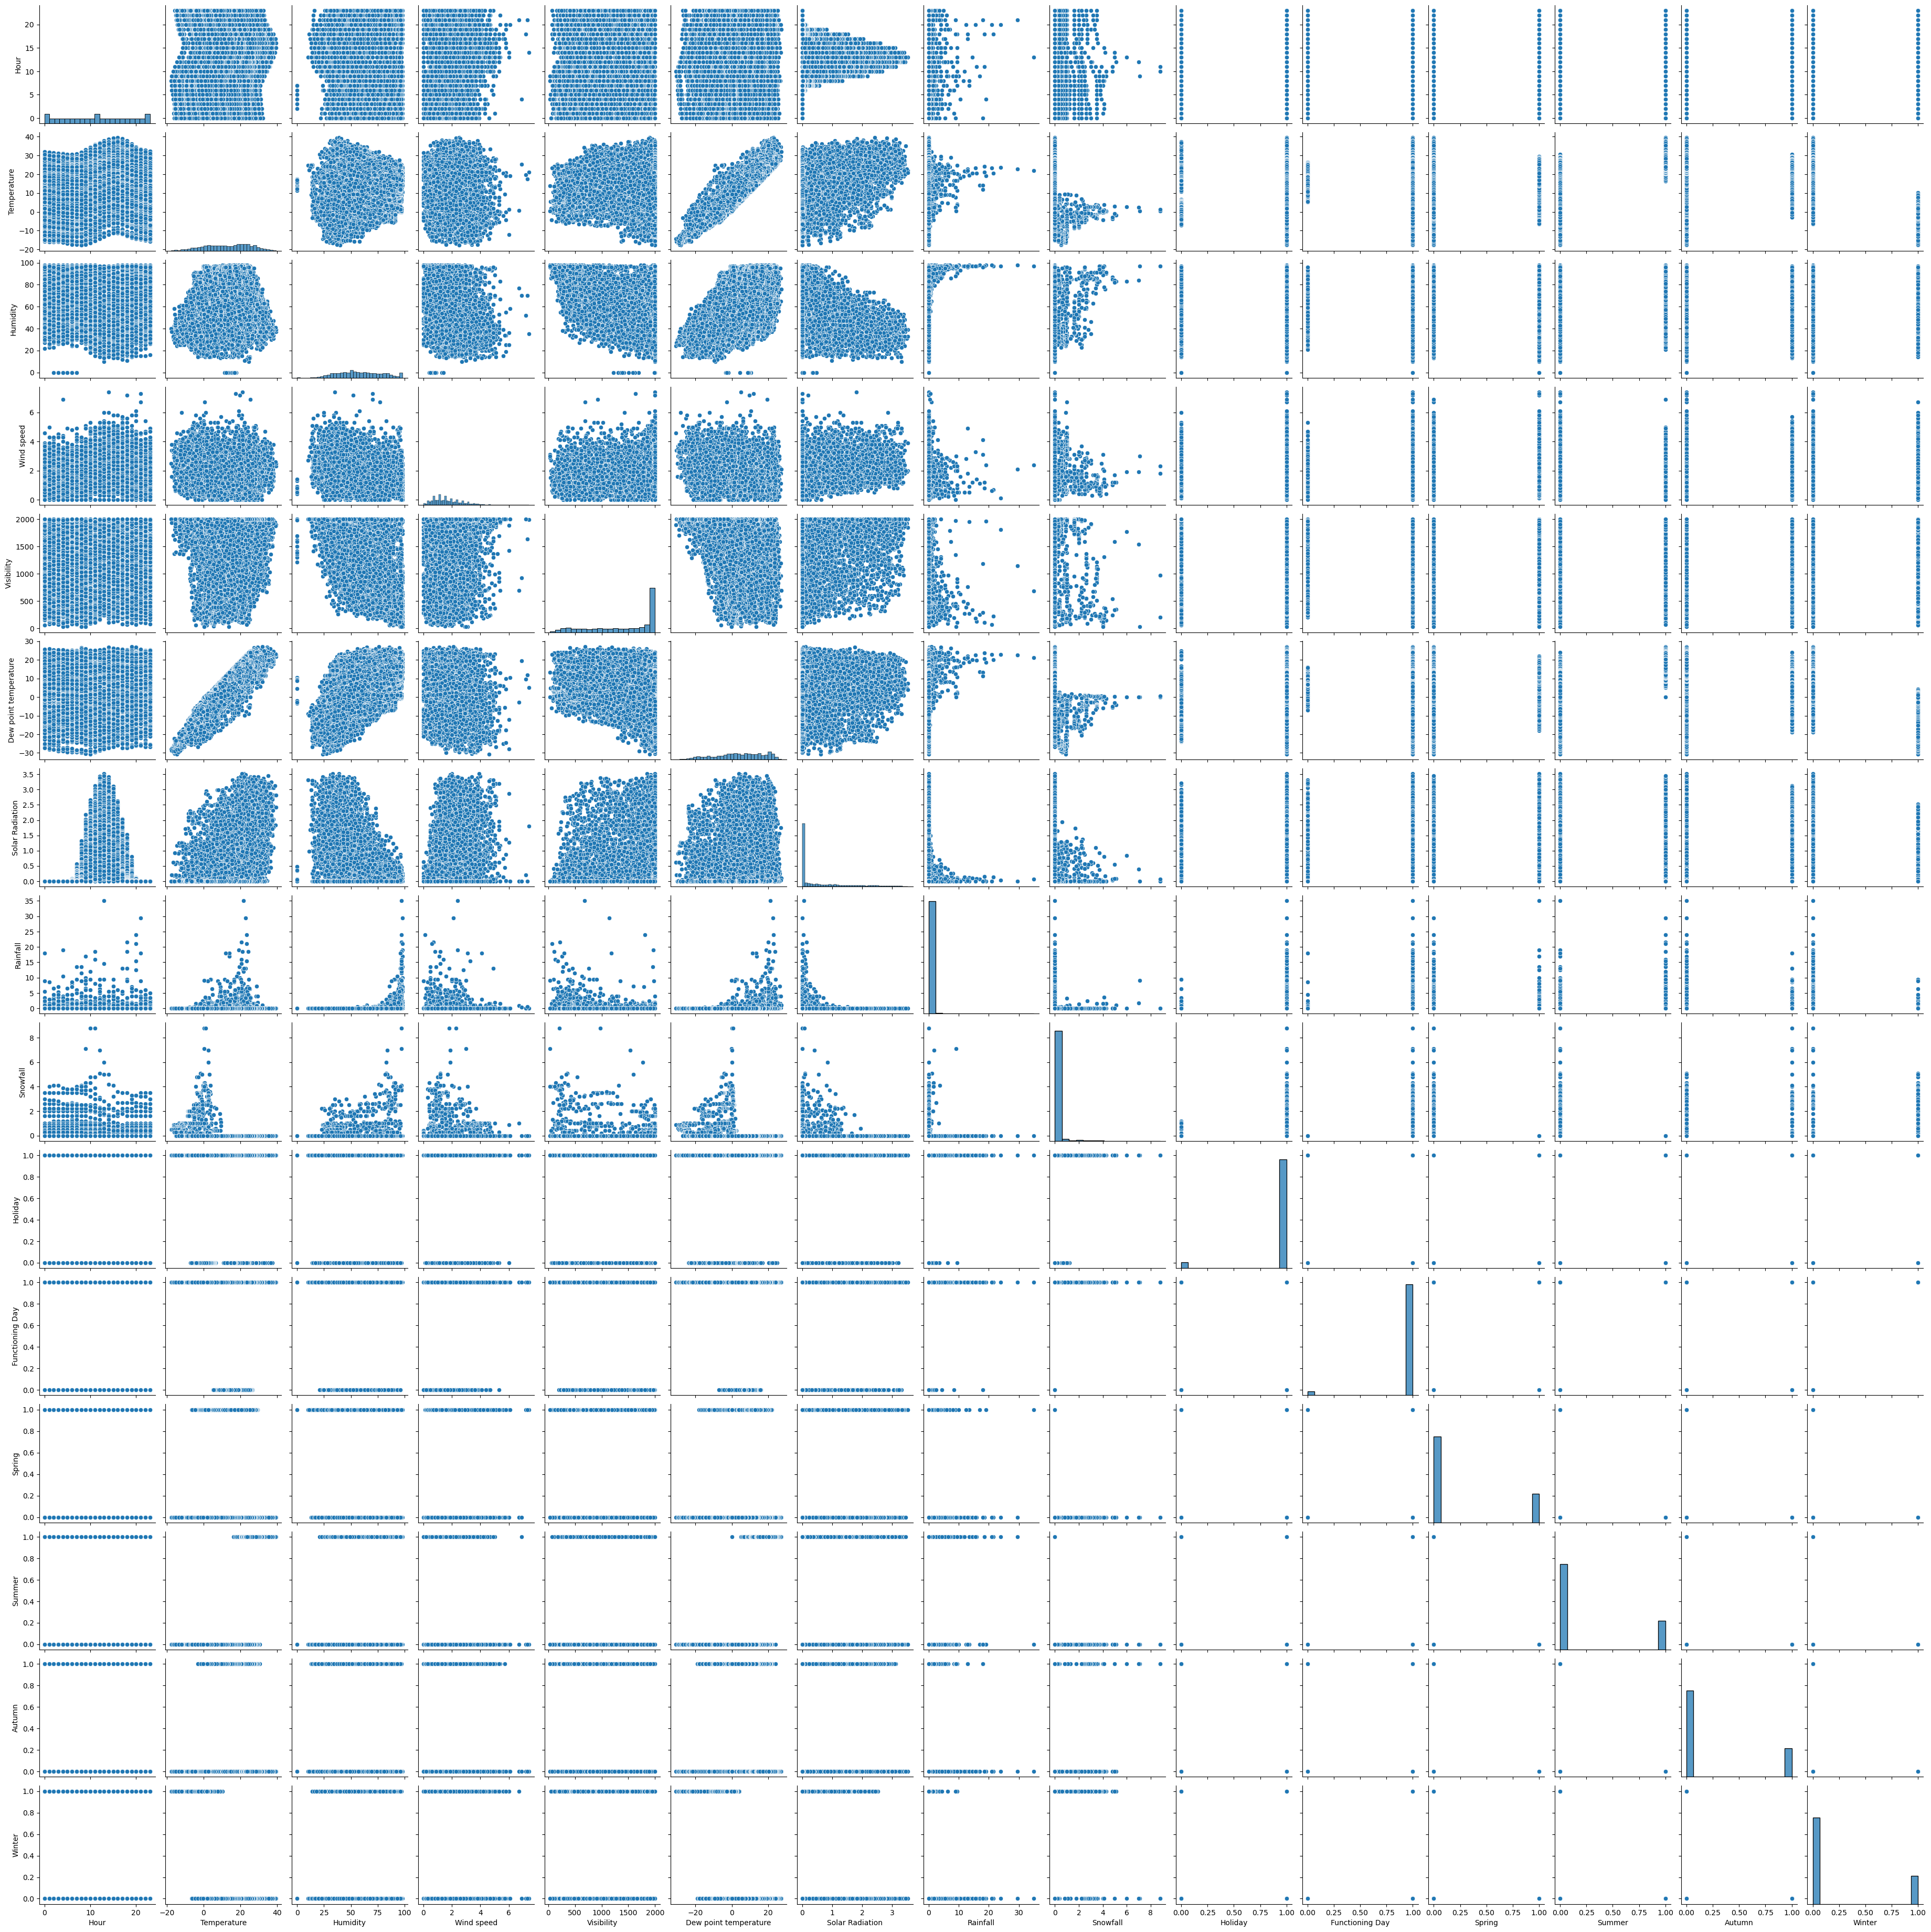

In [24]:
sns.pairplot(features)
plt.show()

#### 현재 삭제할 컬럼들
- Visibility
- Dew Point Temperature
- Spring, Holiday, Autumn (문제 생기면 원복)

In [25]:
# 불필요한 컬럼 삭제
drop_columns = ['Visibility', 'Dew point temperature', 'Spring', 'Holiday', 'Autumn']

pre_b_df = pre_b_df.drop(labels=drop_columns, axis=1)

pre_b_df

Hour  Temperature  Humidity  Wind speed  Solar Radiation  Rainfall  \
0        0         -5.2        37         2.2              0.0       0.0   
1        1         -5.5        38         0.8              0.0       0.0   
2        2         -6.0        39         1.0              0.0       0.0   
3        3         -6.2        40         0.9              0.0       0.0   
4        4         -6.0        36         2.3              0.0       0.0   
...    ...          ...       ...         ...              ...       ...   
8755    19          4.2        34         2.6              0.0       0.0   
8756    20          3.4        37         2.3              0.0       0.0   
8757    21          2.6        39         0.3              0.0       0.0   
8758    22          2.1        41         1.0              0.0       0.0   
8759    23          1.9        43         1.3              0.0       0.0   

      Snowfall  Functioning Day  Summer  Winter  Rented Bike Count  
0          0.0                1       0       1                254  
1          0.0                1       0       1                204  
2          0.0                1       0       1                173  
3          0.0                1       0       1                107  
4          0.0                1       0       1                 78  
...        ...              ...     ...     ...                ...  
8755       0.0                1       0       0               1003  
8756       0.0                1       0       0                764  
8757       0.0                1       0       0                694  
8758       0.0                1       0       0                712  
8759       0.0                1       0       0                584  

[8760 rows x 11 columns]

#### 데이터 전처리 후 상관관계 재조사

In [26]:
# 타겟과의 상관관계 출력
pre_b_df.corr()['Rented Bike Count'].sort_values(ascending=False)[1:]

Temperature        0.538558
Hour               0.410257
Summer             0.296549
Solar Radiation    0.261837
Functioning Day    0.203943
Wind speed         0.121108
Rainfall          -0.123074
Snowfall          -0.141804
Humidity          -0.199780
Winter            -0.424925
Name: Rented Bike Count, dtype: float64

In [27]:
import statsmodels.api as sm

# 불필요한 컬럼을 더 확실하게 골라내기 위한 정보 출력
features, targets = pre_b_df.iloc[:, :-1], pre_b_df.iloc[:, -1]

print(sm.OLS(targets, features).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.791
Model:                            OLS   Adj. R-squared (uncentered):              0.791
Method:                 Least Squares   F-statistic:                              3312.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:48:55   Log-Likelihood:                         -65684.
No. Observations:                8760   AIC:                                  1.314e+05
Df Residuals:                    8750   BIC:                                  1.315e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

<Axes: >

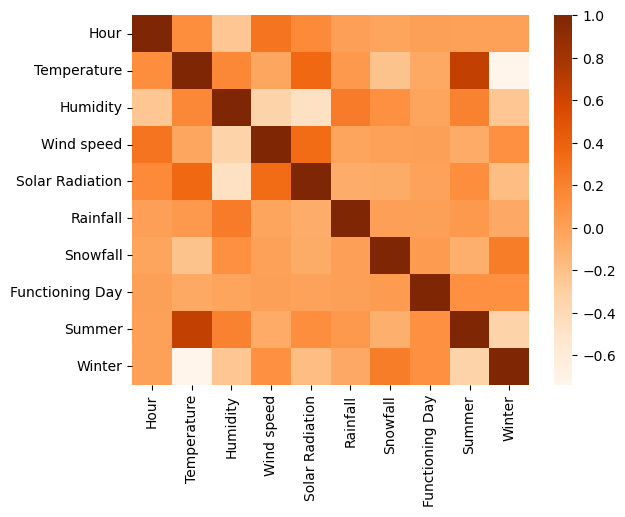

In [28]:
# feature들간의 상관관계 시각화
sns.heatmap(features.corr(), cmap='Oranges')

In [29]:
features.corr()

Hour  Temperature  Humidity  Wind speed  \
Hour             1.000000e+00     0.124114 -0.241644    0.285197   
Temperature      1.241145e-01     1.000000  0.159371   -0.036252   
Humidity        -2.416438e-01     0.159371  1.000000   -0.336683   
Wind speed       2.851967e-01    -0.036252 -0.336683    1.000000   
Solar Radiation  1.451309e-01     0.353505 -0.461919    0.332274   
Rainfall         8.714642e-03     0.050282  0.236397   -0.019674   
Snowfall        -2.151645e-02    -0.218405  0.108183   -0.003554   
Functioning Day  5.439377e-03    -0.050170 -0.020800    0.005037   
Summer           8.578102e-16     0.665846  0.192595   -0.064698   
Winter          -1.697335e-15    -0.738720 -0.238295    0.109186   

                 Solar Radiation  Rainfall  Snowfall  Functioning Day  \
Hour                    0.145131  0.008715 -0.021516         0.005439   
Temperature             0.353505  0.050282 -0.218405        -0.050170   
Humidity               -0.461919  0.236397  0.108183        -0.020800   
Wind speed              0.332274 -0.019674 -0.003554         0.005037   
Solar Radiation         1.000000 -0.074290 -0.072301        -0.007665   
Rainfall               -0.074290  1.000000  0.008500         0.002055   
Snowfall               -0.072301  0.008500  1.000000         0.032089   
Functioning Day        -0.007665  0.002055  0.032089         1.000000   
Summer                  0.128402  0.053928 -0.099785         0.108370   
Winter                 -0.178420 -0.058755  0.225875         0.106795   

                       Summer        Winter  
Hour             8.578102e-16 -1.697335e-15  
Temperature      6.658462e-01 -7.387196e-01  
Humidity         1.925949e-01 -2.382952e-01  
Wind speed      -6.469790e-02  1.091865e-01  
Solar Radiation  1.284017e-01 -1.784202e-01  
Rainfall         5.392817e-02 -5.875456e-02  
Snowfall        -9.978516e-02  2.258745e-01  
Functioning Day  1.083703e-01  1.067954e-01  
Summer           1.000000e+00 -3.320989e-01  
Winter          -3.320989e-01  1.000000e+00

### feature들 간 VIF, 다중 공선성 조사 

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_VIF(features):
    vif = pd.DataFrame()
    vif['score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [31]:
display(feature_engineering_VIF(features))

score          feature
0   4.334206             Hour
1  10.190069      Temperature
2  10.809405         Humidity
3   4.531422       Wind speed
4   2.532180  Solar Radiation
5   1.071564         Rainfall
6   1.131102         Snowfall
7  15.641390  Functioning Day
8   2.782369           Summer
9   3.266083           Winter

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

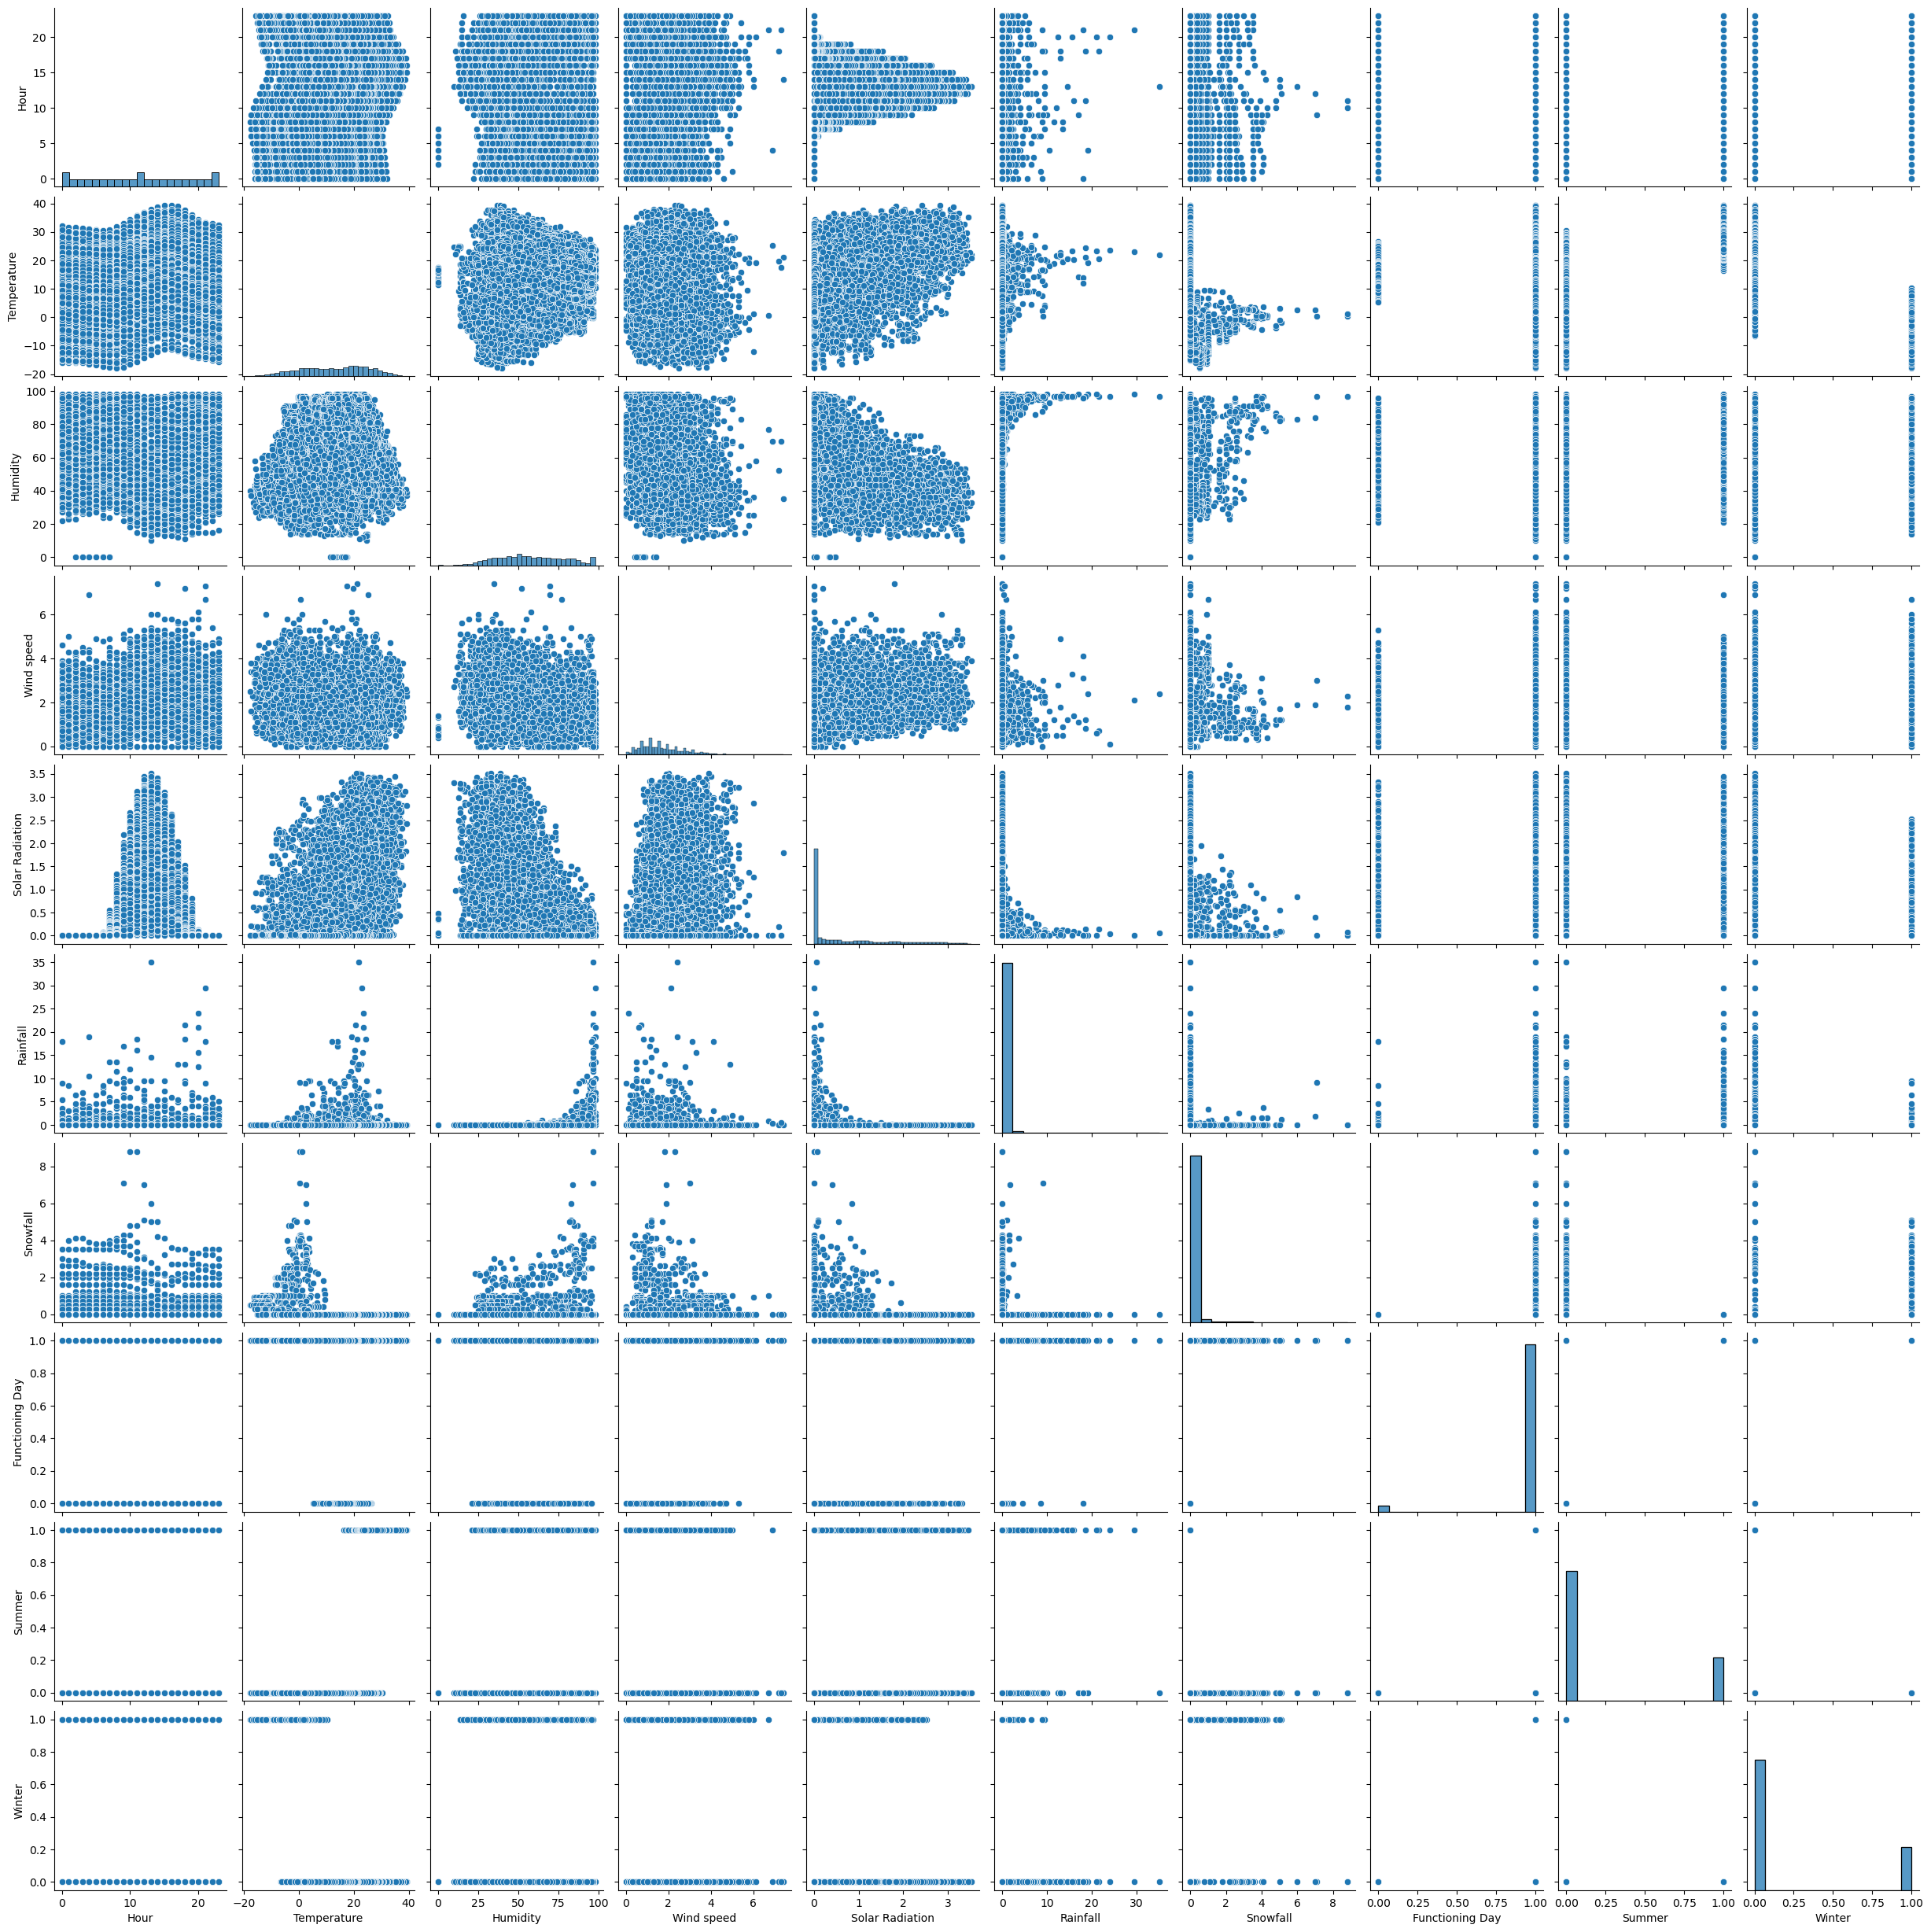

In [32]:
sns.pairplot(features)
plt.show()

#### 현재 삭제할 컬럼들
- Wind speed
- Temperature
- Humidity
- Functioning Day

In [33]:
# 불필요한 컬럼 삭제
drop_columns = ['Temperature', 'Wind speed', 'Humidity', 'Functioning Day']

pre_b_df = pre_b_df.drop(labels=drop_columns, axis=1)

pre_b_df

Hour  Solar Radiation  Rainfall  Snowfall  Summer  Winter  \
0        0              0.0       0.0       0.0       0       1   
1        1              0.0       0.0       0.0       0       1   
2        2              0.0       0.0       0.0       0       1   
3        3              0.0       0.0       0.0       0       1   
4        4              0.0       0.0       0.0       0       1   
...    ...              ...       ...       ...     ...     ...   
8755    19              0.0       0.0       0.0       0       0   
8756    20              0.0       0.0       0.0       0       0   
8757    21              0.0       0.0       0.0       0       0   
8758    22              0.0       0.0       0.0       0       0   
8759    23              0.0       0.0       0.0       0       0   

      Rented Bike Count  
0                   254  
1                   204  
2                   173  
3                   107  
4                    78  
...                 ...  
8755               1003  
8756                764  
8757                694  
8758                712  
8759                584  

[8760 rows x 7 columns]

#### 데이터 전처리 후 상관관계 재조사

In [34]:
# 타겟과의 상관관계 출력
pre_b_df.corr()['Rented Bike Count'].sort_values(ascending=False)[1:]

Hour               0.410257
Summer             0.296549
Solar Radiation    0.261837
Rainfall          -0.123074
Snowfall          -0.141804
Winter            -0.424925
Name: Rented Bike Count, dtype: float64

In [35]:
import statsmodels.api as sm

# 불필요한 컬럼을 더 확실하게 골라내기 위한 정보 출력
features, targets = pre_b_df.iloc[:, :-1], pre_b_df.iloc[:, -1]

print(sm.OLS(targets, features).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.710
Model:                            OLS   Adj. R-squared (uncentered):              0.710
Method:                 Least Squares   F-statistic:                              3576.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:49:09   Log-Likelihood:                         -67115.
No. Observations:                8760   AIC:                                  1.342e+05
Df Residuals:                    8754   BIC:                                  1.343e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

<Axes: >

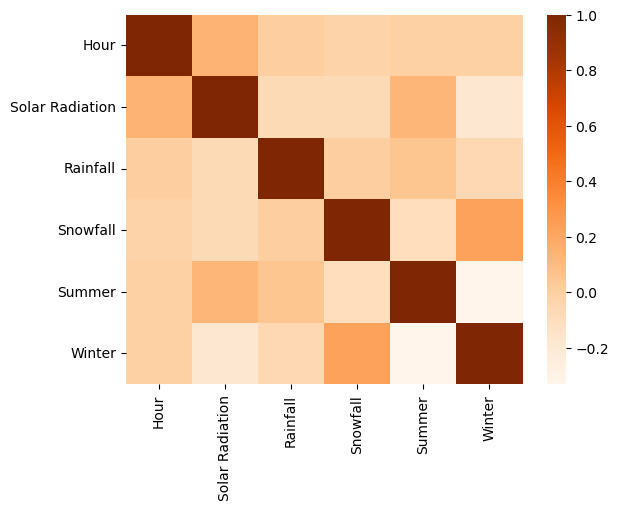

In [36]:
# feature들간의 상관관계 시각화
sns.heatmap(features.corr(), cmap='Oranges')

In [37]:
features.corr()

Hour  Solar Radiation  Rainfall  Snowfall  \
Hour             1.000000e+00         0.145131  0.008715 -0.021516   
Solar Radiation  1.451309e-01         1.000000 -0.074290 -0.072301   
Rainfall         8.714642e-03        -0.074290  1.000000  0.008500   
Snowfall        -2.151645e-02        -0.072301  0.008500  1.000000   
Summer           8.578102e-16         0.128402  0.053928 -0.099785   
Winter          -1.697335e-15        -0.178420 -0.058755  0.225875   

                       Summer        Winter  
Hour             8.578102e-16 -1.697335e-15  
Solar Radiation  1.284017e-01 -1.784202e-01  
Rainfall         5.392817e-02 -5.875456e-02  
Snowfall        -9.978516e-02  2.258745e-01  
Summer           1.000000e+00 -3.320989e-01  
Winter          -3.320989e-01  1.000000e+00

### feature들 간 VIF, 다중 공선성 조사 

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_VIF(features):
    vif = pd.DataFrame()
    vif['score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [39]:
display(feature_engineering_VIF(features))

score          feature
0  1.953547             Hour
1  1.459407  Solar Radiation
2  1.026005         Rainfall
3  1.084836         Snowfall
4  1.334270           Summer
5  1.369965           Winter

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

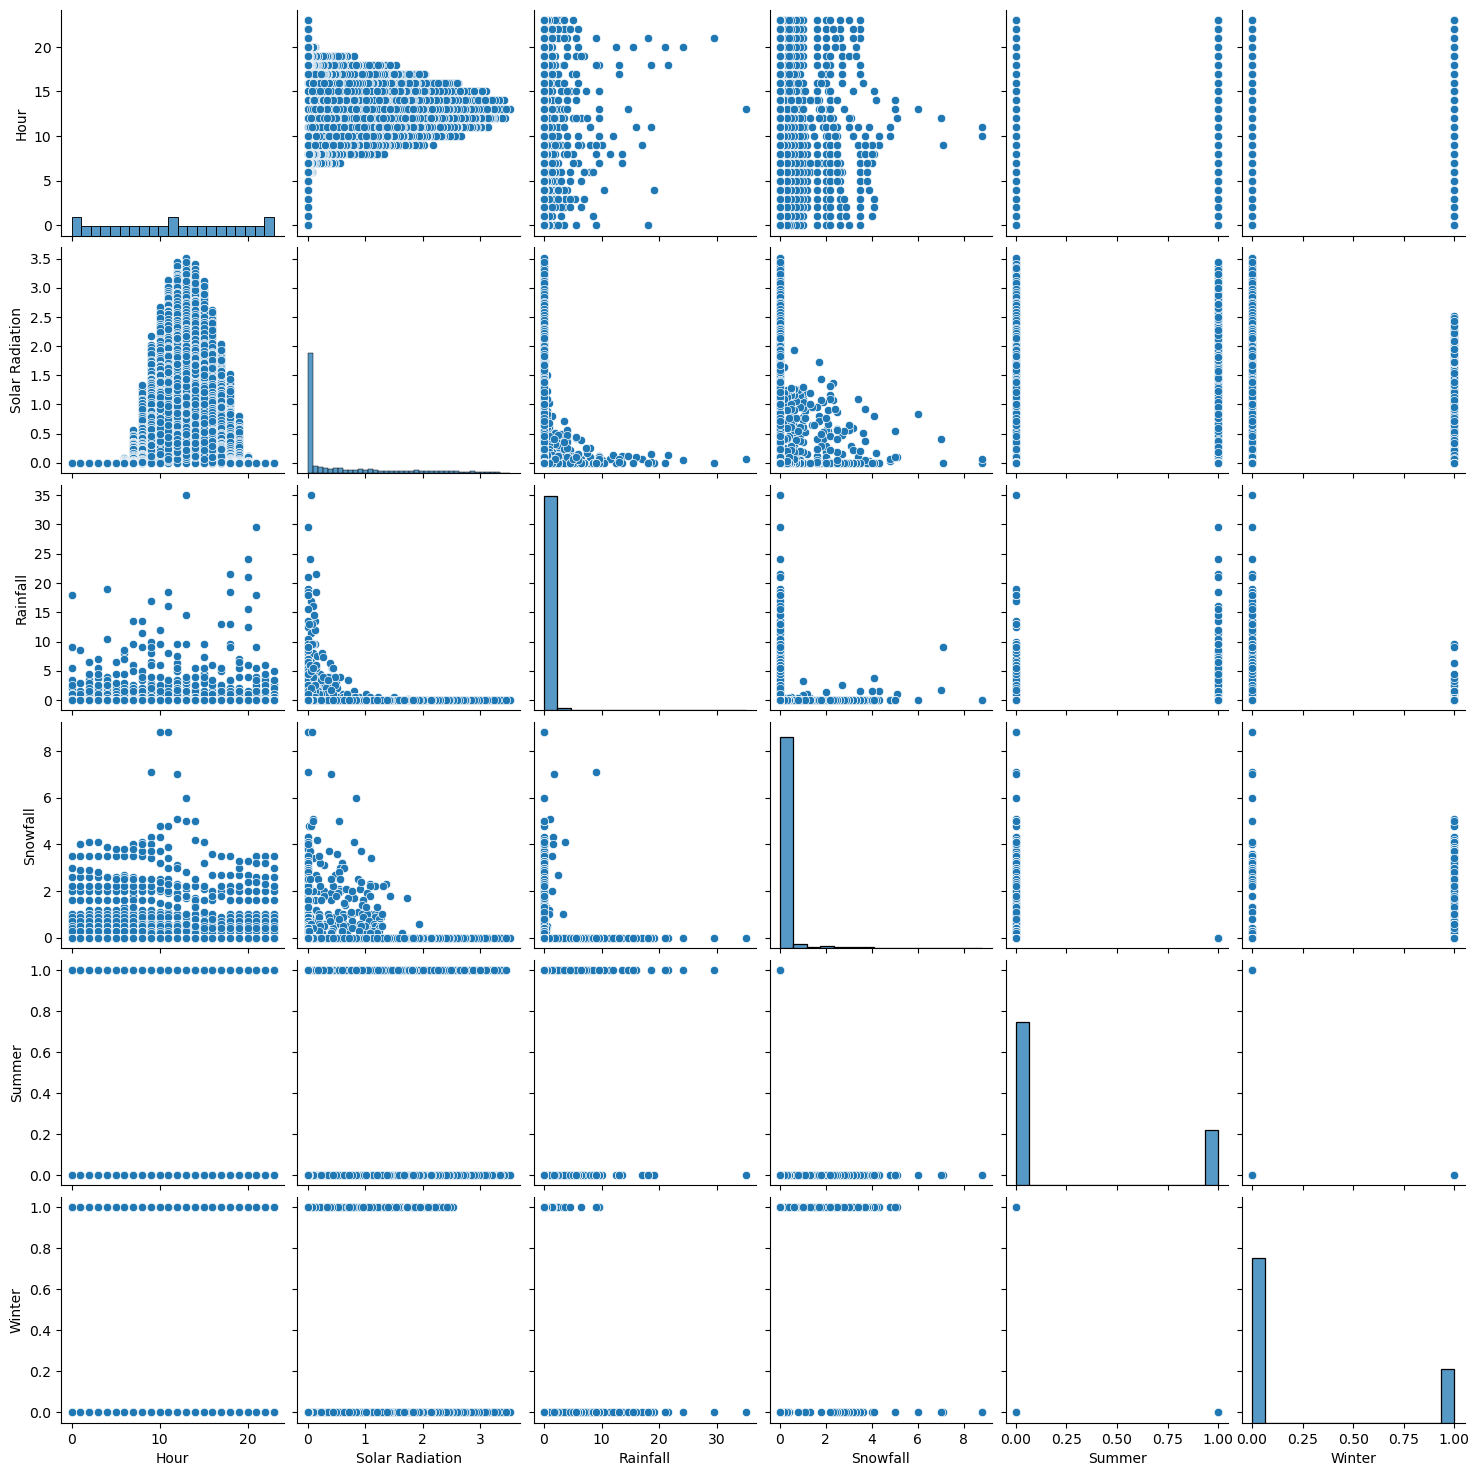

In [40]:
sns.pairplot(features)
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split

features, targets = pre_b_df.iloc[:, :-1], pre_b_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)

In [42]:
import pandas as pd

b_df = pd.read_csv('./datasets/seoul_bicycle.csv', encoding='ISO-8859-1')

b_df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [43]:
pre_b_df = b_df.drop(labels=['Date', 'Seasons', 'Holiday', 'Functioning Day'], axis=1)

pre_b_df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm)  
0              0.0            0.0  
1              0.0            0.0  
2              0.0            0.0  
3              0.0            0.0  
4              0.0            0.0  
...            ...            ...  
8755           0.0            0.0  
8756           0.0            0.0  
8757           0.0            0.0  
8758           0.0            0.0  
8759           0.0            0.0  

[8760 rows x 10 columns]

In [44]:
pre_b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 684.5 KB


In [45]:
import statsmodels.api as sm

# 불필요한 컬럼을 더 확실하게 골라내기 위한 정보 출력
features, targets = pre_b_df.iloc[:, 1:], pre_b_df.iloc[:, 0]

print(sm.OLS(targets, features).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.758
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              3042.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:49:16   Log-Likelihood:                         -66330.
No. Observations:                8760   AIC:                                  1.327e+05
Df Residuals:                    8751   BIC:                                  1.327e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature(°C)'}>],
       [<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Wind speed (m/s)'}>,
        <Axes: title={'center': 'Visibility (10m)'}>],
       [<Axes: title={'center': 'Dew point temperature(°C)'}>,
        <Axes: title={'center': 'Solar Radiation (MJ/m2)'}>,
        <Axes: title={'center': 'Rainfall(mm)'}>],
       [<Axes: title={'center': 'Snowfall (cm)'}>, <Axes: >, <Axes: >]],
      dtype=object)

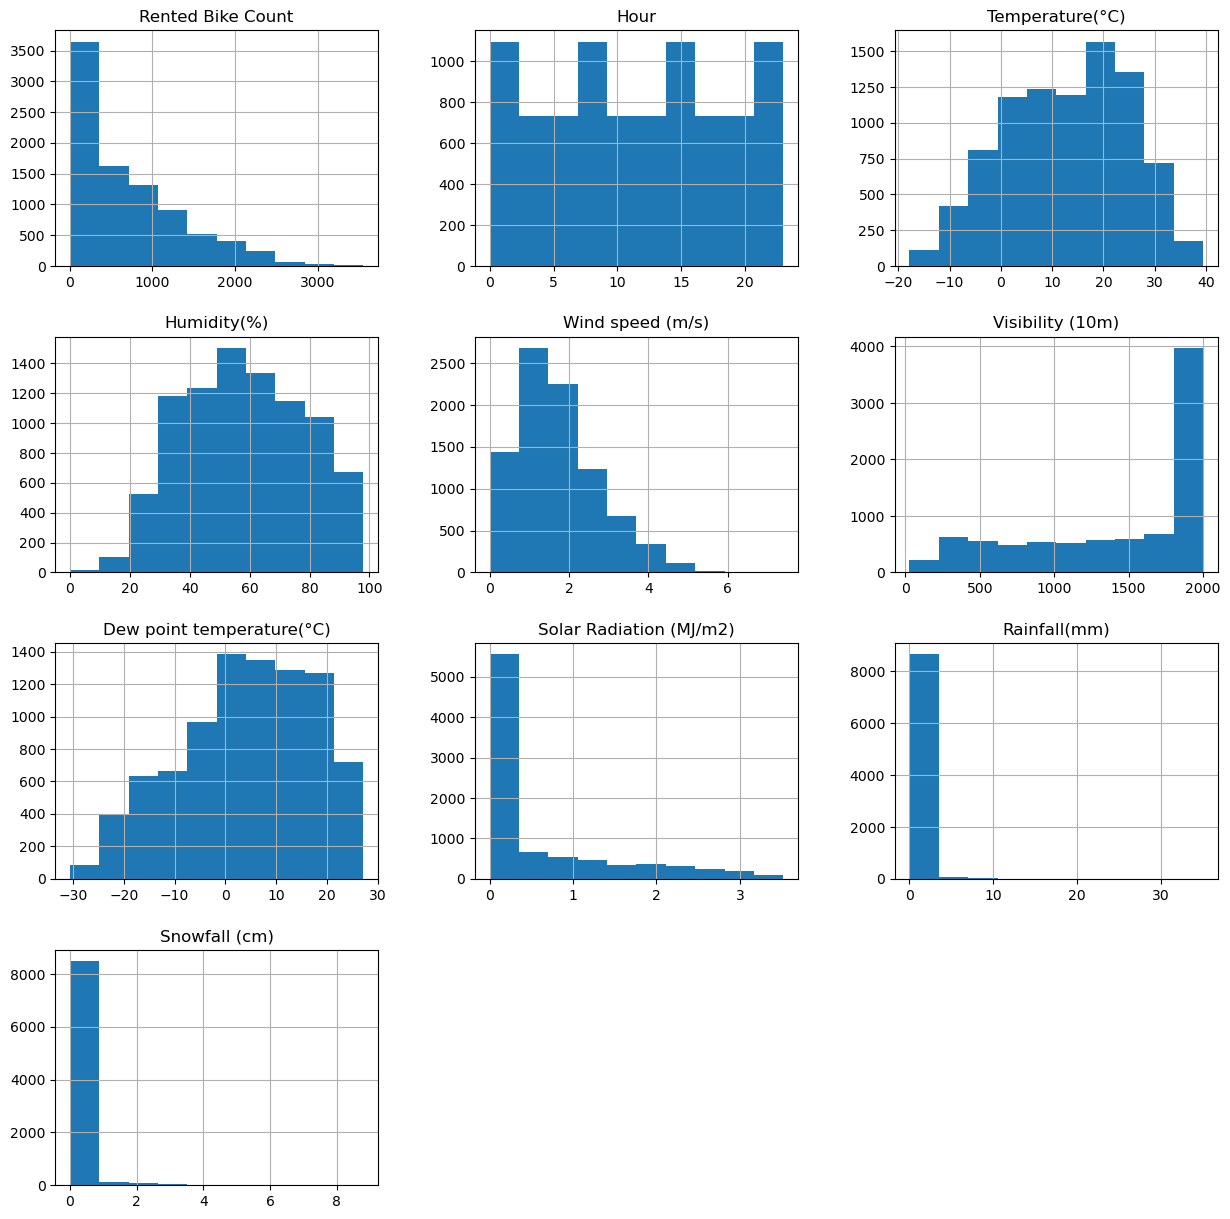

In [46]:
pre_b_df.hist(figsize=(15, 15))

In [47]:
pre_b_df.corr()['Rented Bike Count'].sort_values(ascending=False)[1:]

Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Name: Rented Bike Count, dtype: float64

- 풍속, 강설량 제거

In [48]:
pre_b_df = pre_b_df.drop(labels=['Wind speed (m/s)', 'Snowfall (cm)'], axis=1)

pre_b_df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Visibility (10m)  \
0                   254     0             -5.2           37              2000   
1                   204     1             -5.5           38              2000   
2                   173     2             -6.0           39              2000   
3                   107     3             -6.2           40              2000   
4                    78     4             -6.0           36              2000   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34              1894   
8756                764    20              3.4           37              2000   
8757                694    21              2.6           39              1968   
8758                712    22              2.1           41              1859   
8759                584    23              1.9           43              1909   

      Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  
0                         -17.6                      0.0           0.0  
1                         -17.6                      0.0           0.0  
2                         -17.7                      0.0           0.0  
3                         -17.6                      0.0           0.0  
4                         -18.6                      0.0           0.0  
...                         ...                      ...           ...  
8755                      -10.3                      0.0           0.0  
8756                       -9.9                      0.0           0.0  
8757                       -9.9                      0.0           0.0  
8758                       -9.8                      0.0           0.0  
8759                       -9.3                      0.0           0.0  

[8760 rows x 8 columns]

In [49]:
import statsmodels.api as sm

# 불필요한 컬럼을 더 확실하게 골라내기 위한 정보 출력
features, targets = pre_b_df.iloc[:, 1:], pre_b_df.iloc[:, 0]

print(sm.OLS(targets, features).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.758
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              3910.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:49:17   Log-Likelihood:                         -66332.
No. Observations:                8760   AIC:                                  1.327e+05
Df Residuals:                    8753   BIC:                                  1.327e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

<Axes: >

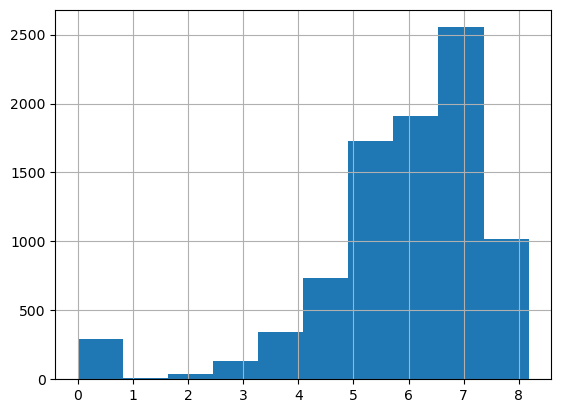

In [50]:
np.log1p(pre_b_df['Rented Bike Count']).hist()

In [51]:
pre_b_df['Rented Bike Count'].value_counts()

Rented Bike Count
0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: count, Length: 2166, dtype: int64

In [52]:
# value_counts가 10 미만인 것들(이상치) 제거

pre_b_df = pre_b_df[pre_b_df['Rented Bike Count'] >= 10]
pre_b_df.reset_index(drop=True)

pre_b_df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Visibility (10m)  \
0                   254     0             -5.2           37              2000   
1                   204     1             -5.5           38              2000   
2                   173     2             -6.0           39              2000   
3                   107     3             -6.2           40              2000   
4                    78     4             -6.0           36              2000   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34              1894   
8756                764    20              3.4           37              2000   
8757                694    21              2.6           39              1968   
8758                712    22              2.1           41              1859   
8759                584    23              1.9           43              1909   

      Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  
0                         -17.6                      0.0           0.0  
1                         -17.6                      0.0           0.0  
2                         -17.7                      0.0           0.0  
3                         -17.6                      0.0           0.0  
4                         -18.6                      0.0           0.0  
...                         ...                      ...           ...  
8755                      -10.3                      0.0           0.0  
8756                       -9.9                      0.0           0.0  
8757                       -9.9                      0.0           0.0  
8758                       -9.8                      0.0           0.0  
8759                       -9.3                      0.0           0.0  

[8426 rows x 8 columns]

array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature(°C)'}>],
       [<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Visibility (10m)'}>,
        <Axes: title={'center': 'Dew point temperature(°C)'}>],
       [<Axes: title={'center': 'Solar Radiation (MJ/m2)'}>,
        <Axes: title={'center': 'Rainfall(mm)'}>, <Axes: >]], dtype=object)

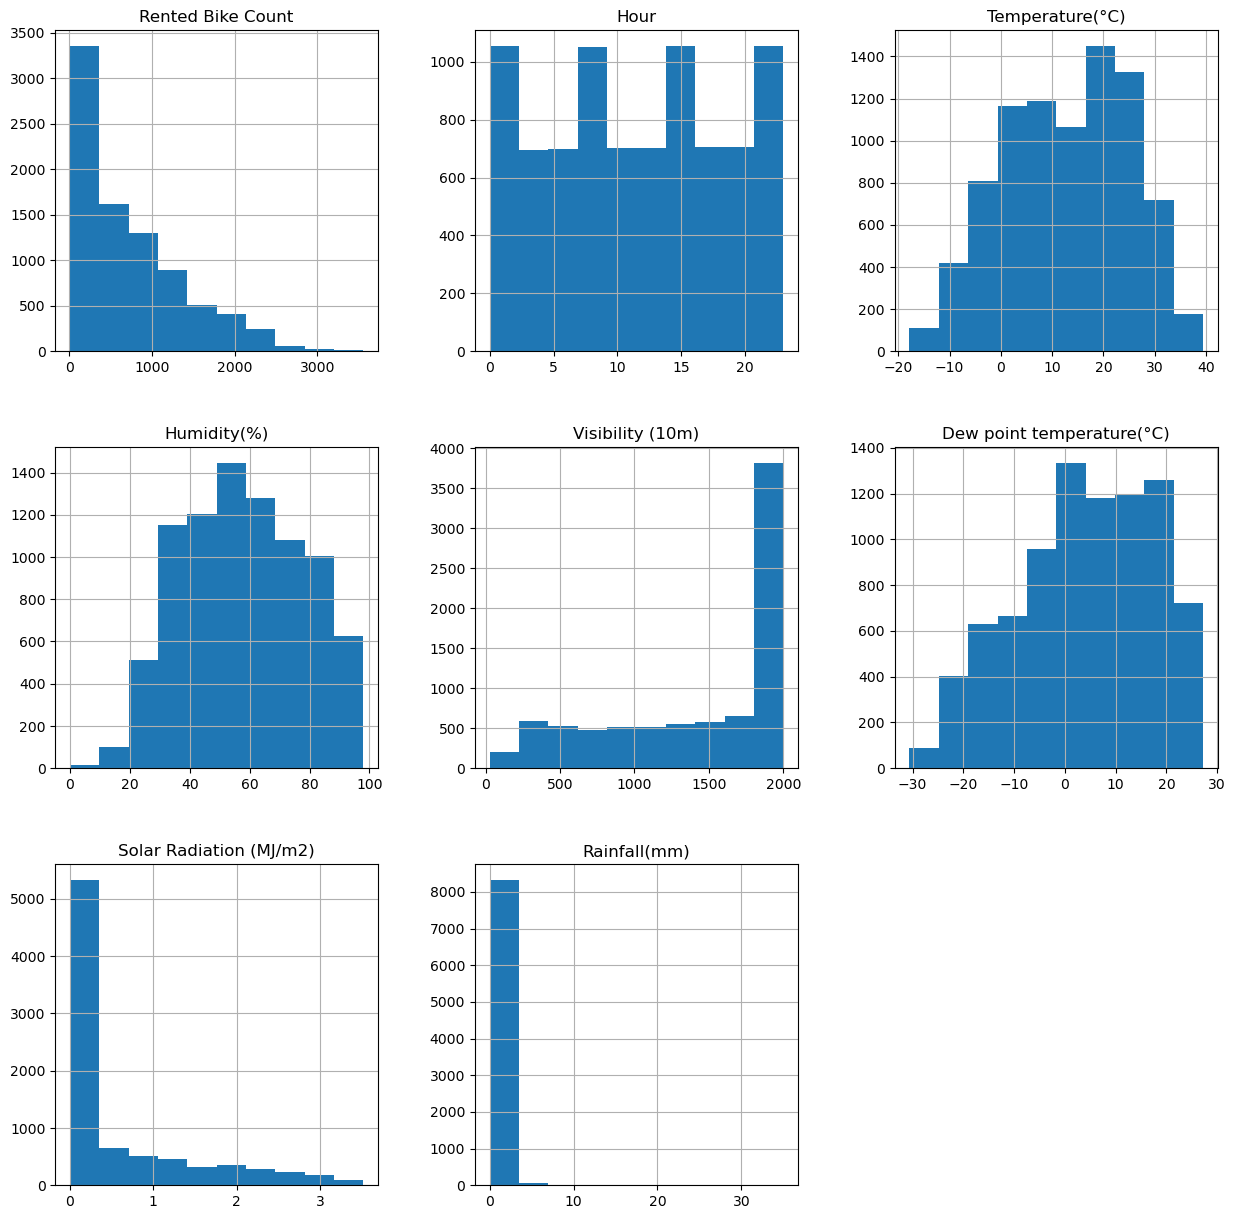

In [53]:
pre_b_df.hist(figsize=(15, 15))

In [54]:
pre_b_df['Rented Bike Count'] = np.log1p(pre_b_df['Rented Bike Count'])

pre_b_df

C:\Users\User\AppData\Local\Temp\ipykernel_7108\506897733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_b_df['Rented Bike Count'] = np.log1p(pre_b_df['Rented Bike Count'])


Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Visibility (10m)  \
0              5.541264     0             -5.2           37              2000   
1              5.323010     1             -5.5           38              2000   
2              5.159055     2             -6.0           39              2000   
3              4.682131     3             -6.2           40              2000   
4              4.369448     4             -6.0           36              2000   
...                 ...   ...              ...          ...               ...   
8755           6.911747    19              4.2           34              1894   
8756           6.639876    20              3.4           37              2000   
8757           6.543912    21              2.6           39              1968   
8758           6.569481    22              2.1           41              1859   
8759           6.371612    23              1.9           43              1909   

      Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  
0                         -17.6                      0.0           0.0  
1                         -17.6                      0.0           0.0  
2                         -17.7                      0.0           0.0  
3                         -17.6                      0.0           0.0  
4                         -18.6                      0.0           0.0  
...                         ...                      ...           ...  
8755                      -10.3                      0.0           0.0  
8756                       -9.9                      0.0           0.0  
8757                       -9.9                      0.0           0.0  
8758                       -9.8                      0.0           0.0  
8759                       -9.3                      0.0           0.0  

[8426 rows x 8 columns]

array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature(°C)'}>],
       [<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Visibility (10m)'}>,
        <Axes: title={'center': 'Dew point temperature(°C)'}>],
       [<Axes: title={'center': 'Solar Radiation (MJ/m2)'}>,
        <Axes: title={'center': 'Rainfall(mm)'}>, <Axes: >]], dtype=object)

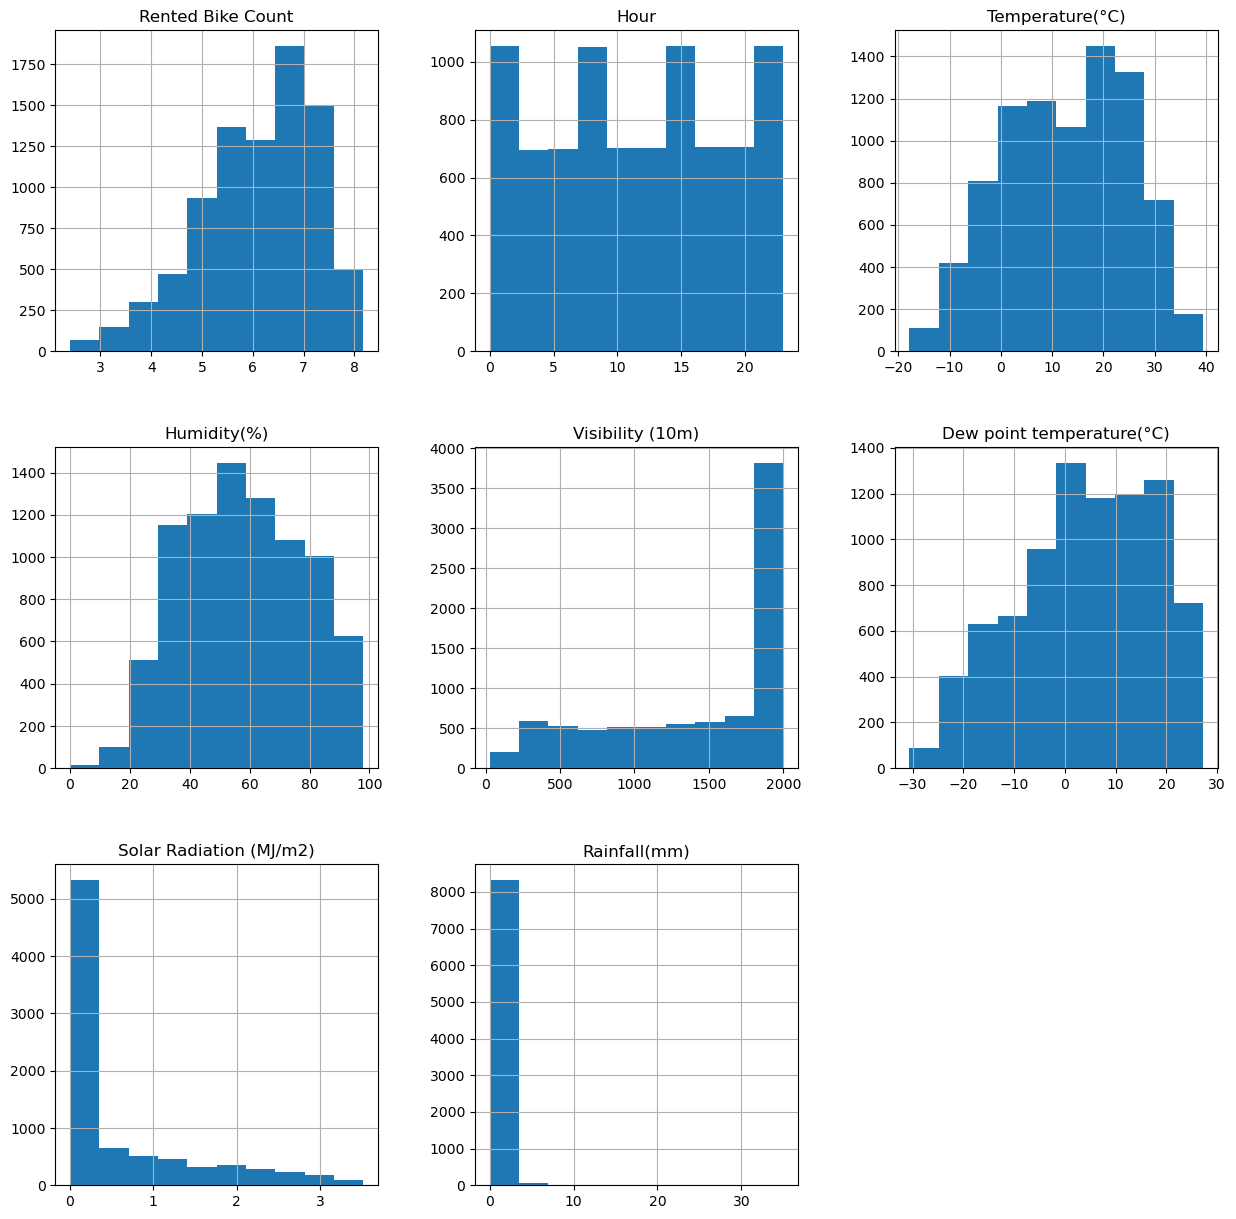

In [55]:
pre_b_df.hist(figsize=(15, 15))

In [56]:
# 분포가 불규칙한 컬럼 제거
# 상관관계도 그리 높지 않았음

pre_b_df = pre_b_df.drop(labels=['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Visibility (10m)'], axis=1)

pre_b_df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0              5.541264     0             -5.2           37   
1              5.323010     1             -5.5           38   
2              5.159055     2             -6.0           39   
3              4.682131     3             -6.2           40   
4              4.369448     4             -6.0           36   
...                 ...   ...              ...          ...   
8755           6.911747    19              4.2           34   
8756           6.639876    20              3.4           37   
8757           6.543912    21              2.6           39   
8758           6.569481    22              2.1           41   
8759           6.371612    23              1.9           43   

      Dew point temperature(°C)  
0                         -17.6  
1                         -17.6  
2                         -17.7  
3                         -17.6  
4                         -18.6  
...                         ...  
8755                      -10.3  
8756                       -9.9  
8757                       -9.9  
8758                       -9.8  
8759                       -9.3  

[8426 rows x 5 columns]

array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>],
       [<Axes: title={'center': 'Temperature(°C)'}>,
        <Axes: title={'center': 'Humidity(%)'}>],
       [<Axes: title={'center': 'Dew point temperature(°C)'}>, <Axes: >]],
      dtype=object)

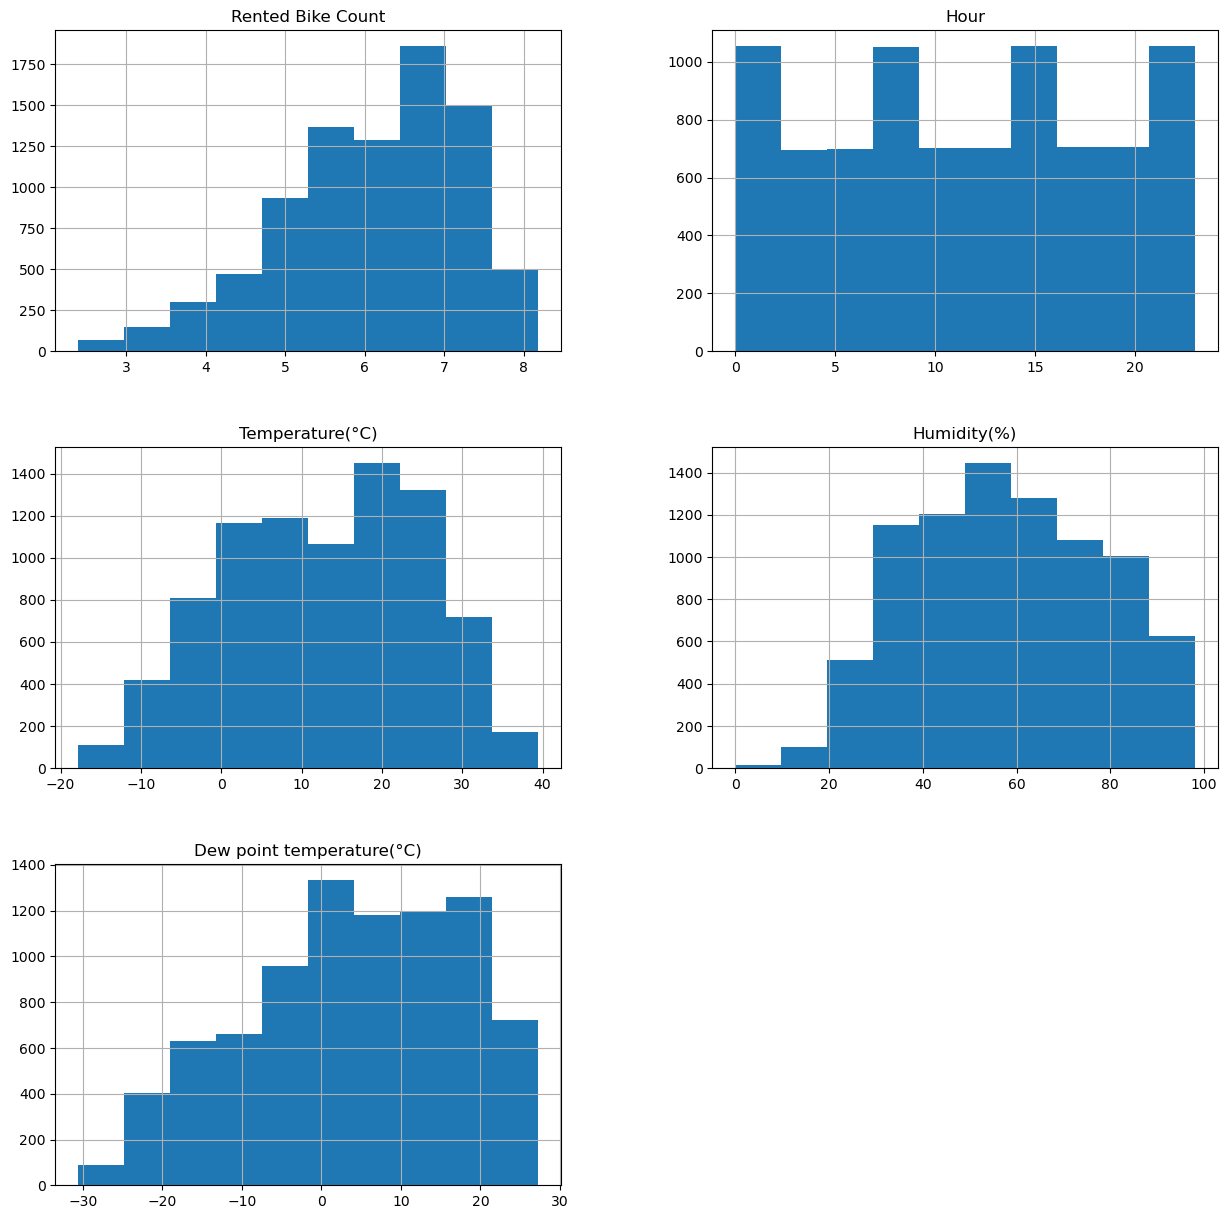

In [57]:
pre_b_df.hist(figsize=(15, 15))

In [58]:
import statsmodels.api as sm

# 불필요한 컬럼을 더 확실하게 골라내기 위한 정보 출력
features, targets = pre_b_df.iloc[:, 1:], pre_b_df.iloc[:, 0]

print(sm.OLS(targets, features).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          1.013e+05
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:49:20   Log-Likelihood:                         -10944.
No. Observations:                8426   AIC:                                  2.190e+04
Df Residuals:                    8422   BIC:                                  2.192e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

#### 중간 분석
- Durbin-Watson 점수가 낮아지는 것은 어쩔 수 없음

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_VIF(features):
    vif = pd.DataFrame()
    vif['score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [60]:
get_VIF(features)

score                    feature
0  4.097544                       Hour
1  9.241849            Temperature(°C)
2  3.038507                Humidity(%)
3  5.260708  Dew point temperature(°C)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

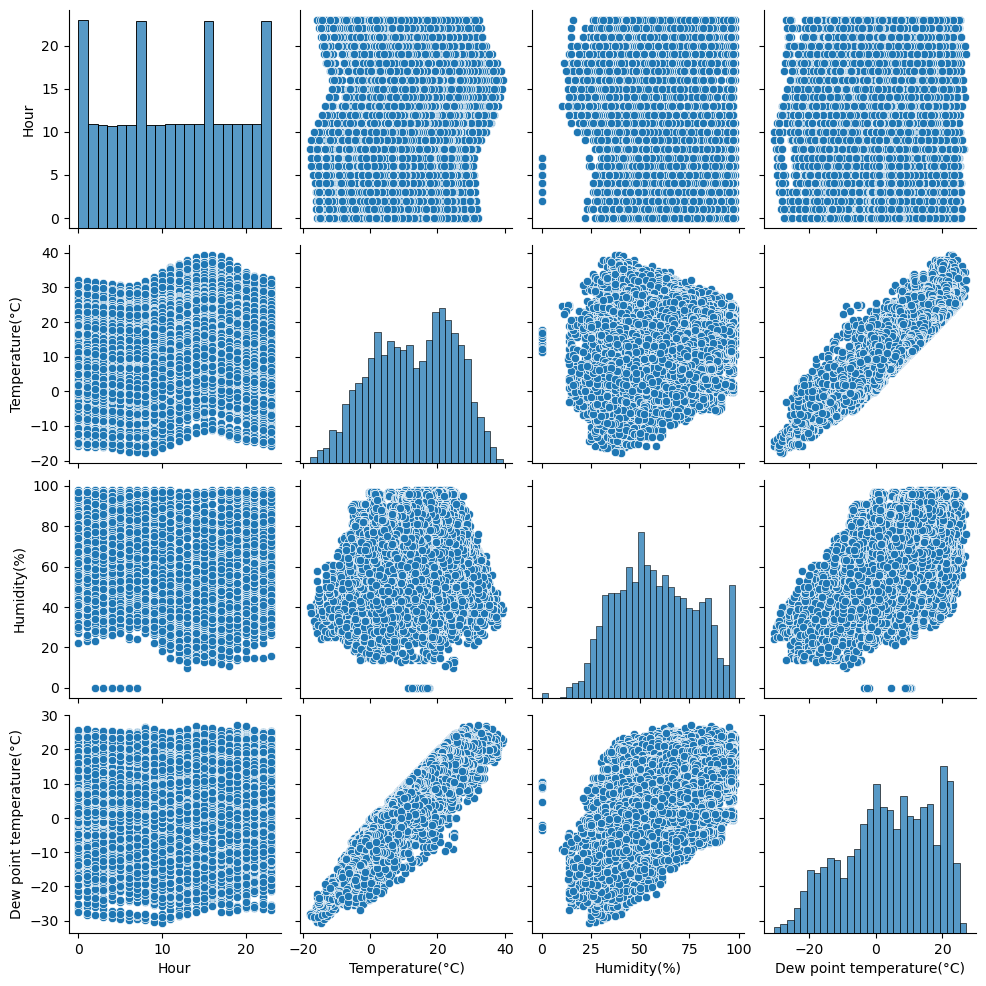

In [61]:
import seaborn as sns

sns.pairplot(features)

In [62]:
pre_b_df.corr()['Rented Bike Count'].sort_values(ascending=False)[1:]

Temperature(°C)              0.575281
Dew point temperature(°C)    0.392263
Hour                         0.383875
Humidity(%)                 -0.261091
Name: Rented Bike Count, dtype: float64

In [63]:
pre_b_df = pre_b_df.drop(labels=['Dew point temperature(°C)'], axis=1)

pre_b_df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)
0              5.541264     0             -5.2           37
1              5.323010     1             -5.5           38
2              5.159055     2             -6.0           39
3              4.682131     3             -6.2           40
4              4.369448     4             -6.0           36
...                 ...   ...              ...          ...
8755           6.911747    19              4.2           34
8756           6.639876    20              3.4           37
8757           6.543912    21              2.6           39
8758           6.569481    22              2.1           41
8759           6.371612    23              1.9           43

[8426 rows x 4 columns]

In [64]:
features, targets = pre_b_df.iloc[:, 1:], pre_b_df.iloc[:, 0]

print(sm.OLS(targets, features).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                          3.361e+04
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:49:23   Log-Likelihood:                         -16552.
No. Observations:                8426   AIC:                                  3.311e+04
Df Residuals:                    8423   BIC:                                  3.313e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [65]:
get_VIF(features)

score          feature
0  2.599292             Hour
1  2.234852  Temperature(°C)
2  3.037354      Humidity(%)

In [66]:
b_df.loc[:, ['Seasons', 'Holiday', 'Functioning Day']]

Seasons     Holiday Functioning Day
0     Winter  No Holiday             Yes
1     Winter  No Holiday             Yes
2     Winter  No Holiday             Yes
3     Winter  No Holiday             Yes
4     Winter  No Holiday             Yes
...      ...         ...             ...
8755  Autumn  No Holiday             Yes
8756  Autumn  No Holiday             Yes
8757  Autumn  No Holiday             Yes
8758  Autumn  No Holiday             Yes
8759  Autumn  No Holiday             Yes

[8760 rows x 3 columns]

- 전부 레이블 인코딩

In [67]:
pre_b_df = pd.concat([pre_b_df, b_df.loc[:, ['Seasons', 'Holiday']]], axis=1)

pre_b_df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%) Seasons  \
0              5.541264   0.0             -5.2         37.0  Winter   
1              5.323010   1.0             -5.5         38.0  Winter   
2              5.159055   2.0             -6.0         39.0  Winter   
3              4.682131   3.0             -6.2         40.0  Winter   
4              4.369448   4.0             -6.0         36.0  Winter   
...                 ...   ...              ...          ...     ...   
8251                NaN   NaN              NaN          NaN  Autumn   
8252                NaN   NaN              NaN          NaN  Autumn   
8253                NaN   NaN              NaN          NaN  Autumn   
8254                NaN   NaN              NaN          NaN  Autumn   
8255                NaN   NaN              NaN          NaN  Autumn   

         Holiday  
0     No Holiday  
1     No Holiday  
2     No Holiday  
3     No Holiday  
4     No Holiday  
...          ...  
8251  No Holiday  
8252  No Holiday  
8253  No Holiday  
8254  No Holiday  
8255  No Holiday  

[8760 rows x 6 columns]

In [68]:
pre_b_df = pre_b_df[~ pre_b_df['Hour'].isna()]

pre_b_df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%) Seasons  \
0              5.541264   0.0             -5.2         37.0  Winter   
1              5.323010   1.0             -5.5         38.0  Winter   
2              5.159055   2.0             -6.0         39.0  Winter   
3              4.682131   3.0             -6.2         40.0  Winter   
4              4.369448   4.0             -6.0         36.0  Winter   
...                 ...   ...              ...          ...     ...   
8755           6.911747  19.0              4.2         34.0  Autumn   
8756           6.639876  20.0              3.4         37.0  Autumn   
8757           6.543912  21.0              2.6         39.0  Autumn   
8758           6.569481  22.0              2.1         41.0  Autumn   
8759           6.371612  23.0              1.9         43.0  Autumn   

         Holiday  
0     No Holiday  
1     No Holiday  
2     No Holiday  
3     No Holiday  
4     No Holiday  
...          ...  
8755  No Holiday  
8756  No Holiday  
8757  No Holiday  
8758  No Holiday  
8759  No Holiday  

[8426 rows x 6 columns]

In [69]:
pre_b_df = pre_b_df.reset_index(drop=True)

pre_b_df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%) Seasons  \
0              5.541264   0.0             -5.2         37.0  Winter   
1              5.323010   1.0             -5.5         38.0  Winter   
2              5.159055   2.0             -6.0         39.0  Winter   
3              4.682131   3.0             -6.2         40.0  Winter   
4              4.369448   4.0             -6.0         36.0  Winter   
...                 ...   ...              ...          ...     ...   
8421           6.911747  19.0              4.2         34.0  Autumn   
8422           6.639876  20.0              3.4         37.0  Autumn   
8423           6.543912  21.0              2.6         39.0  Autumn   
8424           6.569481  22.0              2.1         41.0  Autumn   
8425           6.371612  23.0              1.9         43.0  Autumn   

         Holiday  
0     No Holiday  
1     No Holiday  
2     No Holiday  
3     No Holiday  
4     No Holiday  
...          ...  
8421  No Holiday  
8422  No Holiday  
8423  No Holiday  
8424  No Holiday  
8425  No Holiday  

[8426 rows x 6 columns]

In [70]:
from sklearn.preprocessing import LabelEncoder

columns = ['Holiday']

label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(pre_b_df[column])
    label_encoders[column] = encoder.classes_
    pre_b_df[column] = result

pre_b_df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%) Seasons  Holiday
0              5.541264   0.0             -5.2         37.0  Winter        1
1              5.323010   1.0             -5.5         38.0  Winter        1
2              5.159055   2.0             -6.0         39.0  Winter        1
3              4.682131   3.0             -6.2         40.0  Winter        1
4              4.369448   4.0             -6.0         36.0  Winter        1
...                 ...   ...              ...          ...     ...      ...
8421           6.911747  19.0              4.2         34.0  Autumn        1
8422           6.639876  20.0              3.4         37.0  Autumn        1
8423           6.543912  21.0              2.6         39.0  Autumn        1
8424           6.569481  22.0              2.1         41.0  Autumn        1
8425           6.371612  23.0              1.9         43.0  Autumn        1

[8426 rows x 6 columns]

In [71]:
def change_seasons(season):
    if season == 'Spring':
        return 0
    if season == 'Summer':
        return 1
    if season == 'Autumn':
        return 2
    if season == 'Winter':
        return 3

In [72]:
pre_b_df['Seasons'] = pre_b_df['Seasons'].apply(change_seasons)

pre_b_df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Seasons  Holiday
0              5.541264   0.0             -5.2         37.0        3        1
1              5.323010   1.0             -5.5         38.0        3        1
2              5.159055   2.0             -6.0         39.0        3        1
3              4.682131   3.0             -6.2         40.0        3        1
4              4.369448   4.0             -6.0         36.0        3        1
...                 ...   ...              ...          ...      ...      ...
8421           6.911747  19.0              4.2         34.0        2        1
8422           6.639876  20.0              3.4         37.0        2        1
8423           6.543912  21.0              2.6         39.0        2        1
8424           6.569481  22.0              2.1         41.0        2        1
8425           6.371612  23.0              1.9         43.0        2        1

[8426 rows x 6 columns]

In [73]:
features, targets = pre_b_df.iloc[:, 1:], pre_b_df.iloc[:, 0]

print(sm.OLS(targets, features).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          4.529e+04
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:49:41   Log-Likelihood:                         -13326.
No. Observations:                8426   AIC:                                  2.666e+04
Df Residuals:                    8421   BIC:                                  2.670e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [74]:
get_VIF(features)

score          feature
0   3.657459             Hour
1   3.019810  Temperature(°C)
2   7.527542      Humidity(%)
3   3.291734          Seasons
4  10.838956          Holiday

In [77]:
features.Seasons.value_counts()

Seasons
1    2205
3    2148
0    2142
2    1931
Name: count, dtype: int64

In [79]:
get_VIF(features.drop(labels=['Holiday'], axis=1))

score          feature
0  3.179365             Hour
1  2.853665  Temperature(°C)
2  4.462280      Humidity(%)
3  2.864817          Seasons

In [80]:
pre_b_df = pre_b_df.drop(labels=['Holiday'], axis=1)

pre_b_df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Seasons
0              5.541264   0.0             -5.2         37.0        3
1              5.323010   1.0             -5.5         38.0        3
2              5.159055   2.0             -6.0         39.0        3
3              4.682131   3.0             -6.2         40.0        3
4              4.369448   4.0             -6.0         36.0        3
...                 ...   ...              ...          ...      ...
8421           6.911747  19.0              4.2         34.0        2
8422           6.639876  20.0              3.4         37.0        2
8423           6.543912  21.0              2.6         39.0        2
8424           6.569481  22.0              2.1         41.0        2
8425           6.371612  23.0              1.9         43.0        2

[8426 rows x 5 columns]

In [81]:
features, targets = pre_b_df.iloc[:, 1:], pre_b_df.iloc[:, 0]

print(sm.OLS(targets, features).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                          3.274e+04
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:56:14   Log-Likelihood:                         -15525.
No. Observations:                8426   AIC:                                  3.106e+04
Df Residuals:                    8422   BIC:                                  3.109e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [82]:
get_VIF(features)

score          feature
0  3.179365             Hour
1  2.853665  Temperature(°C)
2  4.462280      Humidity(%)
3  2.864817          Seasons

array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>],
       [<Axes: title={'center': 'Temperature(°C)'}>,
        <Axes: title={'center': 'Humidity(%)'}>],
       [<Axes: title={'center': 'Seasons'}>, <Axes: >]], dtype=object)

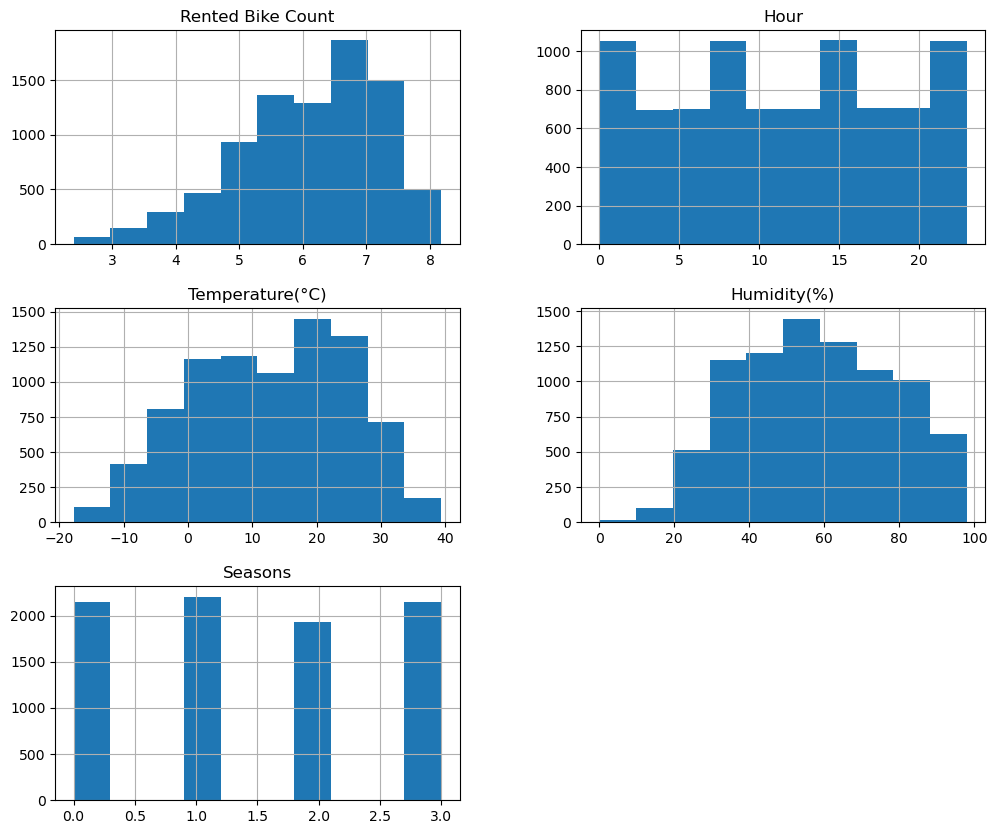

In [85]:
pre_b_df.hist(figsize=(12, 10))

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split